In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import normaltest
import statsmodels.api as sm

import pickle
import json


import warnings
warnings.filterwarnings("ignore")

# Problem Statement

In [2]:
df = pd.read_csv(r"D:\Python practice\Datasets\linear regression Datasets\autos_dataset.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


# Exploratory Data Analyisis

In [3]:
df.shape

(205, 26)

In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [9]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


# Feature Engineering

### 1. Symboling

In [10]:
df["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [11]:
df["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

### 2. Normalized-losses

In [12]:
df["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [13]:
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [14]:
norm_mean = df.loc[~(df["normalized-losses"] == "?"),"normalized-losses"].astype(int).mean()

In [15]:
df["normalized-losses"] = df["normalized-losses"].replace("?",norm_mean).astype(int)

In [16]:
df["normalized-losses"].value_counts()

122    45
161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
65      5
94      5
168     5
106     4
148     4
118     4
93      4
83      3
101     3
115     3
154     3
125     3
137     3
108     2
87      2
119     2
194     2
197     2
89      2
158     2
192     2
113     2
188     2
81      2
110     2
145     2
129     2
164     2
153     2
186     1
107     1
78      1
231     1
77      1
142     1
98      1
121     1
90      1
256     1
Name: normalized-losses, dtype: int64

In [17]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


### 3. Make

In [18]:
df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [19]:
df["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [20]:
def make_othrs(value):

    return 1 if value in ["dodge", "mercedes-benz","bmw","audi","plymouth","saab","porsche",
                          "isuzu","jaguar","chevrolet","alfa_romeo","renault","mercury"] else 0


In [21]:
df["make_others"] = df["make"].apply(make_othrs)
df["make_others"]

0      0
1      0
2      0
3      1
4      1
      ..
200    0
201    0
202    0
203    0
204    0
Name: make_others, Length: 205, dtype: int64

In [22]:
ohe = OneHotEncoder()
features = ohe.fit_transform(df[["make"]])

df1 = pd.DataFrame(features.toarray(),columns=ohe.get_feature_names(["make"]))
df = pd.concat([df,df1],axis=1)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_others', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo'],
      dtype='object')

In [24]:
df.drop(['make','make_dodge','make_mercedes-benz','make_bmw','make_audi','make_plymouth','make_porsche', 'make_renault',
         'make_saab','make_isuzu','make_jaguar','make_alfa-romero','make_chevrolet',
         'make_mercury','make_honda'],axis=1,inplace=True)

### 4. Fuel-type

In [25]:
df["fuel-type"].unique()

array(['gas', 'diesel'], dtype=object)

In [26]:
df["fuel-type"].value_counts().to_dict()

{'gas': 185, 'diesel': 20}

In [27]:
fuel_type = {'gas': 0, 'diesel': 1}

In [28]:
df["fuel-type"] = df["fuel-type"].replace({'gas': 0, 'diesel': 1})

In [29]:
df["fuel-type"].value_counts()

0    185
1     20
Name: fuel-type, dtype: int64

### 5. Aspiration

In [30]:
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [31]:
df["aspiration"].value_counts().to_dict()

{'std': 168, 'turbo': 37}

In [32]:
aspiration = {'std': 0, 'turbo': 1}

In [33]:
df["aspiration"] = df["aspiration"].replace({'std': 0, 'turbo': 1})

In [34]:
df["aspiration"].value_counts()

0    168
1     37
Name: aspiration, dtype: int64

### 6. Num-of-doors

In [35]:
df["num-of-doors"].unique()

array(['two', 'four', '?'], dtype=object)

In [36]:
df["num-of-doors"].value_counts().to_dict()

{'four': 114, 'two': 89, '?': 2}

In [37]:
df["num-of-doors"] = df["num-of-doors"].replace({'four': 4, 'two': 2, '?': 4})

In [38]:
num_of_doors = {'four': 4, 'two': 2}

In [39]:
df.head(2)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,price,make_others,make_mazda,make_mitsubishi,make_nissan,make_peugot,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,122,0,0,2,convertible,rwd,front,88.6,168.8,...,13495,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,122,0,0,2,convertible,rwd,front,88.6,168.8,...,16500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 7. Body-style

In [40]:
df["body-style"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [41]:
df["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [42]:
df = pd.get_dummies(df,columns=["body-style"],drop_first=True,)
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_nissan,make_peugot,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,122,0,0,2,rwd,front,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,3,122,0,0,2,rwd,front,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,1,122,0,0,2,rwd,front,94.5,171.2,65.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
3,2,164,0,0,4,fwd,front,99.8,176.6,66.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
4,2,164,0,0,4,4wd,front,99.4,176.6,66.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,0,0,4,rwd,front,109.1,188.8,68.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
201,-1,95,0,1,4,rwd,front,109.1,188.8,68.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
202,-1,95,0,0,4,rwd,front,109.1,188.8,68.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
203,-1,95,1,1,4,rwd,front,109.1,188.8,68.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0


### 8. Drive-wheels

In [43]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [44]:
df["drive-wheels"].value_counts().to_dict()

{'fwd': 120, 'rwd': 76, '4wd': 9}

In [45]:
drive_wheels = {'fwd': 0, 'rwd': 1, '4wd': 4}

In [46]:
df["drive-wheels"].replace({'fwd': 0, 'rwd': 1, '4wd': 4},inplace=True)

In [47]:
df.head(2)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_nissan,make_peugot,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,122,0,0,2,1,front,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,3,122,0,0,2,1,front,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


### 9. Engine-location

In [48]:
df["engine-location"].unique()

array(['front', 'rear'], dtype=object)

In [49]:
df["engine-location"].value_counts().to_dict()

{'front': 202, 'rear': 3}

In [50]:
engine_location = {'front': 0, 'rear':1}

In [51]:
df["engine-location"].replace({'front': 0, 'rear':1},inplace=True)

In [52]:
df.head(2)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_nissan,make_peugot,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,122,0,0,2,1,0,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,3,122,0,0,2,1,0,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


### 10. Wheel-base

In [53]:
df["wheel-base"].unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   normalized-losses     205 non-null    int32  
 2   fuel-type             205 non-null    int64  
 3   aspiration            205 non-null    int64  
 4   num-of-doors          205 non-null    int64  
 5   drive-wheels          205 non-null    int64  
 6   engine-location       205 non-null    int64  
 7   wheel-base            205 non-null    float64
 8   length                205 non-null    float64
 9   width                 205 non-null    float64
 10  height                205 non-null    float64
 11  curb-weight           205 non-null    int64  
 12  engine-type           205 non-null    object 
 13  num-of-cylinders      205 non-null    object 
 14  engine-size           205 non-null    int64  
 15  fuel-system           2

### 11. Length

In [55]:
df["length"].unique()

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

### 12. width

In [56]:
df["width"].unique()

array([64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64.8, 66.9, 70.9, 60.3,
       63.6, 63.8, 64.6, 63.9, 64. , 65.2, 62.5, 66. , 61.8, 69.6, 70.6,
       64.2, 65.7, 66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4,
       68.4, 68.3, 65. , 72.3, 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

### 13. Height

In [57]:
df["height"].unique()

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52. , 53.7, 56.3, 53.2, 50.8,
       50.6, 59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4,
       52.8, 47.8, 49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8,
       49.4, 51.6, 54.7, 55.1, 56.1, 49.7, 56. , 50.5, 55.2, 52.5, 53. ,
       59.1, 53.9, 55.6, 56.2, 57.5])

### 14. Curb-weight

In [58]:
df["curb-weight"].unique()

array([2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 3053, 2395, 2710,
       2765, 3055, 3230, 3380, 3505, 1488, 1874, 1909, 1876, 2128, 1967,
       1989, 2191, 2535, 2811, 1713, 1819, 1837, 1940, 1956, 2010, 2024,
       2236, 2289, 2304, 2372, 2465, 2293, 2734, 4066, 3950, 1890, 1900,
       1905, 1945, 1950, 2380, 2385, 2500, 2410, 2443, 2425, 2670, 2700,
       3515, 3750, 3495, 3770, 3740, 3685, 3900, 3715, 2910, 1918, 1944,
       2004, 2145, 2370, 2328, 2833, 2921, 2926, 2365, 2405, 2403, 1889,
       2017, 1938, 1951, 2028, 1971, 2037, 2008, 2324, 2302, 3095, 3296,
       3060, 3071, 3139, 3020, 3197, 3430, 3075, 3252, 3285, 3485, 3130,
       2818, 2778, 2756, 2800, 3366, 2579, 2460, 2658, 2695, 2707, 2758,
       2808, 2847, 2050, 2120, 2240, 2190, 2340, 2510, 2290, 2455, 2420,
       2650, 1985, 2040, 2015, 2280, 3110, 2081, 2109, 2275, 2094, 2122,
       2140, 2169, 2204, 2265, 2300, 2540, 2536, 2551, 2679, 2714, 2975,
       2326, 2480, 2414, 2458, 2976, 3016, 3131, 31

### 15. Engine-type

In [59]:
df["engine-type"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [60]:
df["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [61]:
df["engine-type"].replace({"l":"ohc"},inplace=True)

In [62]:
df["engine-type"].value_counts().to_dict()

{'ohc': 160, 'ohcf': 15, 'ohcv': 13, 'dohc': 12, 'rotor': 4, 'dohcv': 1}

In [63]:
engine_type = {'ohc': 0, 'ohcf': 1, 'ohcv': 2, 'dohc': 3, 'rotor': 4, 'dohcv': 5}

In [64]:
df["engine-type"].replace({'ohc': 0, 'ohcf': 1, 'ohcv': 2, 'dohc': 3, 'rotor': 4, 'dohcv': 5},inplace=True)

In [65]:
df["engine-type"].value_counts()

0    160
1     15
2     13
3     12
4      4
5      1
Name: engine-type, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   normalized-losses     205 non-null    int32  
 2   fuel-type             205 non-null    int64  
 3   aspiration            205 non-null    int64  
 4   num-of-doors          205 non-null    int64  
 5   drive-wheels          205 non-null    int64  
 6   engine-location       205 non-null    int64  
 7   wheel-base            205 non-null    float64
 8   length                205 non-null    float64
 9   width                 205 non-null    float64
 10  height                205 non-null    float64
 11  curb-weight           205 non-null    int64  
 12  engine-type           205 non-null    int64  
 13  num-of-cylinders      205 non-null    object 
 14  engine-size           205 non-null    int64  
 15  fuel-system           2

### 16. Num-of-cylinders

In [67]:
df["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [68]:
df["num-of-cylinders"].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [69]:
num_of_cylinders = {'four': 4,'six': 6,'five': 5,'eight': 8,'two': 2,'three': 3,'twelve': 12}

In [70]:
df["num-of-cylinders"].replace({'four': 4,'six': 6,'five': 5,'eight': 8,'two': 2,'three': 3,'twelve': 12},inplace=True)

In [71]:
df["num-of-cylinders"].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: num-of-cylinders, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   normalized-losses     205 non-null    int32  
 2   fuel-type             205 non-null    int64  
 3   aspiration            205 non-null    int64  
 4   num-of-doors          205 non-null    int64  
 5   drive-wheels          205 non-null    int64  
 6   engine-location       205 non-null    int64  
 7   wheel-base            205 non-null    float64
 8   length                205 non-null    float64
 9   width                 205 non-null    float64
 10  height                205 non-null    float64
 11  curb-weight           205 non-null    int64  
 12  engine-type           205 non-null    int64  
 13  num-of-cylinders      205 non-null    int64  
 14  engine-size           205 non-null    int64  
 15  fuel-system           2

### 17. Fuel-system 

In [73]:
df["fuel-system"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [74]:
df["fuel-system"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [75]:
def others(value):
    if value == "spdi":
        return 1
        print(value)
    elif value == "4bbl":
        return 1
        print(value)
    elif value == "mfi":
        return 1
        print(value)
    elif value == "spfi":
        return 1
        print(value)
    else:
        return 0
        print(value)       

In [76]:
df["fuel-system"].head(50)

0     mpfi
1     mpfi
2     mpfi
3     mpfi
4     mpfi
5     mpfi
6     mpfi
7     mpfi
8     mpfi
9     mpfi
10    mpfi
11    mpfi
12    mpfi
13    mpfi
14    mpfi
15    mpfi
16    mpfi
17    mpfi
18    2bbl
19    2bbl
20    2bbl
21    2bbl
22    2bbl
23    mpfi
24    2bbl
25    2bbl
26    2bbl
27    mpfi
28    2bbl
29     mfi
30    1bbl
31    1bbl
32    1bbl
33    1bbl
34    1bbl
35    1bbl
36    1bbl
37    1bbl
38    1bbl
39    1bbl
40    1bbl
41    mpfi
42    2bbl
43    2bbl
44    2bbl
45    2bbl
46    spfi
47    mpfi
48    mpfi
49    mpfi
Name: fuel-system, dtype: object

In [77]:
df["fuel-system_others"] = df["fuel-system"].apply(others)

In [78]:
df = pd.get_dummies(df,columns=["fuel-system"],drop_first=True)

In [79]:
df.head(5)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,body-style_sedan,body-style_wagon,fuel-system_others,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,122,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,122,0,0,2,1,0,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,164,0,0,4,0,0,99.8,176.6,66.2,...,1,0,0,0,0,0,0,1,0,0
4,2,164,0,0,4,4,0,99.4,176.6,66.4,...,1,0,0,0,0,0,0,1,0,0


In [80]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_others', 'make_mazda', 'make_mitsubishi',
       'make_nissan', 'make_peugot', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'fuel-system_others', 'fuel-system_2bbl', 'fuel-system_4bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi', 'fuel-system_spfi'],
      dtype='object')

In [81]:
df.drop(["fuel-system_4bbl",'fuel-system_mfi','fuel-system_spdi','fuel-system_spfi'],axis=1,inplace=True)

In [82]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_others', 'make_mazda', 'make_mitsubishi',
       'make_nissan', 'make_peugot', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'fuel-system_others', 'fuel-system_2bbl', 'fuel-system_idi',
       'fuel-system_mpfi'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   normalized-losses     205 non-null    int32  
 2   fuel-type             205 non-null    int64  
 3   aspiration            205 non-null    int64  
 4   num-of-doors          205 non-null    int64  
 5   drive-wheels          205 non-null    int64  
 6   engine-location       205 non-null    int64  
 7   wheel-base            205 non-null    float64
 8   length                205 non-null    float64
 9   width                 205 non-null    float64
 10  height                205 non-null    float64
 11  curb-weight           205 non-null    int64  
 12  engine-type           205 non-null    int64  
 13  num-of-cylinders      205 non-null    int64  
 14  engine-size           205 non-null    int64  
 15  bore                  2

### 18. Bore

In [84]:
df["bore"].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [85]:
df["bore"].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.7      5
3.01     5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.13     2
3.63     2
3.5      2
3.8      2
3.33     2
2.54     1
3.08     1
3.61     1
3.34     1
3.6      1
2.92     1
3.76     1
2.68     1
2.99     1
Name: bore, dtype: int64

In [86]:
bore_mean = df.loc[~(df["bore"] == "?"), "bore"].astype(float).mean()

In [87]:
df.loc[(df["bore"] == "?"), "bore"] = 3.32

In [88]:
df["bore"].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.7      5
3.01     5
3.35     4
3.32     4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.13     2
3.63     2
3.5      2
3.8      2
3.33     2
2.54     1
3.08     1
3.61     1
3.34     1
3.6      1
2.92     1
3.76     1
2.68     1
2.99     1
Name: bore, dtype: int64

In [89]:
df["bore"] = df["bore"].astype(float)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   normalized-losses     205 non-null    int32  
 2   fuel-type             205 non-null    int64  
 3   aspiration            205 non-null    int64  
 4   num-of-doors          205 non-null    int64  
 5   drive-wheels          205 non-null    int64  
 6   engine-location       205 non-null    int64  
 7   wheel-base            205 non-null    float64
 8   length                205 non-null    float64
 9   width                 205 non-null    float64
 10  height                205 non-null    float64
 11  curb-weight           205 non-null    int64  
 12  engine-type           205 non-null    int64  
 13  num-of-cylinders      205 non-null    int64  
 14  engine-size           205 non-null    int64  
 15  bore                  2

### 19. Stroke

In [91]:
df["stroke"].unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [92]:
df["stroke"].value_counts()

3.4     20
3.23    14
3.15    14
3.03    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.11     6
3.27     6
3.41     6
3.07     6
3.58     6
3.19     6
3.5      6
3.64     5
3.52     5
3.86     4
3.54     4
3.47     4
?        4
3.9      3
2.9      3
3.1      2
4.17     2
2.8      2
2.19     2
3.08     2
2.68     2
2.36     1
3.16     1
2.07     1
3.21     1
3.12     1
2.76     1
2.87     1
Name: stroke, dtype: int64

In [93]:
stroke_mean = round(df.loc[~(df["stroke"] == "?"), "stroke"].astype(float).mean(),2)

In [94]:
df.loc[(df["stroke"] == "?"), "stroke"] = stroke_mean

In [95]:
df["stroke"].value_counts()

3.4     20
3.23    14
3.15    14
3.03    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.11     6
3.27     6
3.41     6
3.07     6
3.58     6
3.19     6
3.5      6
3.64     5
3.52     5
3.86     4
3.54     4
3.47     4
3.26     4
3.9      3
2.9      3
3.1      2
4.17     2
2.8      2
2.19     2
3.08     2
2.68     2
2.36     1
3.16     1
2.07     1
3.21     1
3.12     1
2.76     1
2.87     1
Name: stroke, dtype: int64

In [96]:
df["stroke"] = df["stroke"].astype(float)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   normalized-losses     205 non-null    int32  
 2   fuel-type             205 non-null    int64  
 3   aspiration            205 non-null    int64  
 4   num-of-doors          205 non-null    int64  
 5   drive-wheels          205 non-null    int64  
 6   engine-location       205 non-null    int64  
 7   wheel-base            205 non-null    float64
 8   length                205 non-null    float64
 9   width                 205 non-null    float64
 10  height                205 non-null    float64
 11  curb-weight           205 non-null    int64  
 12  engine-type           205 non-null    int64  
 13  num-of-cylinders      205 non-null    int64  
 14  engine-size           205 non-null    int64  
 15  bore                  2

### 20. Horsepower

In [98]:
df["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [99]:
df["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

In [100]:
horsepower_mean = round(df.loc[~(df["horsepower"] == "?"),"horsepower"].astype(float).mean())

In [101]:
df.loc[(df["horsepower"] == "?"),"horsepower"] = horsepower_mean

In [102]:
df["horsepower"] = df["horsepower"].astype(float)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   normalized-losses     205 non-null    int32  
 2   fuel-type             205 non-null    int64  
 3   aspiration            205 non-null    int64  
 4   num-of-doors          205 non-null    int64  
 5   drive-wheels          205 non-null    int64  
 6   engine-location       205 non-null    int64  
 7   wheel-base            205 non-null    float64
 8   length                205 non-null    float64
 9   width                 205 non-null    float64
 10  height                205 non-null    float64
 11  curb-weight           205 non-null    int64  
 12  engine-type           205 non-null    int64  
 13  num-of-cylinders      205 non-null    int64  
 14  engine-size           205 non-null    int64  
 15  bore                  2

### 21. Peak-rpm

In [104]:
df["peak-rpm"].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [105]:
df["peak-rpm"].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5250     7
4500     7
5800     7
4200     5
4150     5
4750     4
4350     4
5100     3
4250     3
5900     3
4400     3
?        2
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peak-rpm, dtype: int64

In [106]:
peak_rpm_median = round(df.loc[~(df["peak-rpm"] == "?"),"peak-rpm"].astype(int).median())

In [107]:
df.loc[(df["peak-rpm"] == "?"),"peak-rpm"] = peak_rpm_median

In [108]:
df["peak-rpm"] = df["peak-rpm"].astype(int)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   normalized-losses     205 non-null    int32  
 2   fuel-type             205 non-null    int64  
 3   aspiration            205 non-null    int64  
 4   num-of-doors          205 non-null    int64  
 5   drive-wheels          205 non-null    int64  
 6   engine-location       205 non-null    int64  
 7   wheel-base            205 non-null    float64
 8   length                205 non-null    float64
 9   width                 205 non-null    float64
 10  height                205 non-null    float64
 11  curb-weight           205 non-null    int64  
 12  engine-type           205 non-null    int64  
 13  num-of-cylinders      205 non-null    int64  
 14  engine-size           205 non-null    int64  
 15  bore                  2

### 22. Price

In [110]:
df["price"].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [111]:
df["price"].value_counts()

?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 187, dtype: int64

In [112]:
price_median = round(df.loc[~(df["price"] == "?"),"price"].astype(int).median())

In [113]:
df.loc[(df["price"] == "?"),"price"] = price_median

In [114]:
df["price"] = df["price"].astype(int)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   normalized-losses     205 non-null    int32  
 2   fuel-type             205 non-null    int64  
 3   aspiration            205 non-null    int64  
 4   num-of-doors          205 non-null    int64  
 5   drive-wheels          205 non-null    int64  
 6   engine-location       205 non-null    int64  
 7   wheel-base            205 non-null    float64
 8   length                205 non-null    float64
 9   width                 205 non-null    float64
 10  height                205 non-null    float64
 11  curb-weight           205 non-null    int64  
 12  engine-type           205 non-null    int64  
 13  num-of-cylinders      205 non-null    int64  
 14  engine-size           205 non-null    int64  
 15  bore                  2

# Feature Selection

In [116]:
df.corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_volkswagen,make_volvo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_others,fuel-system_2bbl,fuel-system_idi,fuel-system_mpfi
symboling,1.000000,4.651899e-01,-0.194311,-0.059866,-0.663595,-0.104505,2.124709e-01,-0.531954,-0.357612,-0.232919,...,0.167106,-0.403849,0.168845,0.435648,-0.378341,-0.298243,0.300785,-0.034069,-0.194311,0.012532
normalized-losses,0.465190,1.000000e+00,-0.101437,-0.006823,-0.357192,0.035599,-2.918301e-17,-0.056518,0.019209,0.084195,...,-0.003945,-0.230147,0.042244,0.196926,-0.032170,-0.276410,0.117485,-0.148000,-0.101437,0.200111
fuel-type,-0.194311,-1.014370e-01,1.000000,0.401397,0.188496,0.001367,-4.006951e-02,0.308346,0.212679,0.233880,...,0.198133,-0.005338,0.018635,-0.202093,0.185623,0.028183,-0.089018,-0.226565,1.000000,-0.302574
aspiration,-0.059866,-6.822700e-03,0.401397,1.000000,0.052803,0.141013,-5.719146e-02,0.257611,0.234539,0.300567,...,-0.008961,0.169682,-0.029074,0.009786,0.017111,0.018908,0.325488,-0.323378,0.401397,-0.050041
num-of-doors,-0.663595,-3.571925e-01,0.188496,0.052803,1.000000,0.040527,-1.391294e-01,0.439635,0.385675,0.197735,...,0.050718,0.208575,-0.230063,-0.614538,0.526181,0.326437,-0.231054,0.013769,0.188496,0.035746
drive-wheels,-0.104505,3.559946e-02,0.001367,0.141013,0.040527,1.000000,6.281341e-02,0.209492,0.252670,0.215544,...,-0.154780,0.122733,0.075248,-0.131413,-0.049412,0.192088,-0.058197,-0.154901,0.001367,0.240740
engine-location,0.212471,-2.918301e-17,-0.040070,-0.057191,-0.139129,0.062813,1.000000e+00,-0.187790,-0.050989,-0.051698,...,-0.030388,-0.029019,0.394978,-0.087754,-0.114369,-0.045417,-0.032994,-0.083975,-0.040070,0.132429
wheel-base,-0.531954,-5.651842e-02,0.308346,0.257611,0.439635,0.209492,-1.877902e-01,1.000000,0.874587,0.795144,...,-0.047664,0.306228,-0.008608,-0.386094,0.291086,0.210899,-0.146773,-0.396505,0.308346,0.348891
length,-0.357612,1.920863e-02,0.212679,0.234539,0.385675,0.252670,-5.098854e-02,0.874587,1.000000,0.841118,...,-0.030714,0.285398,0.047292,-0.436269,0.269647,0.219683,-0.092220,-0.487237,0.212679,0.511374
width,-0.232919,8.419470e-02,0.233880,0.300567,0.197735,0.215544,-5.169764e-02,0.795144,0.841118,1.000000,...,-0.033924,0.228758,0.066360,-0.222308,0.154637,0.060639,-0.046171,-0.522594,0.233880,0.461896


<AxesSubplot:>

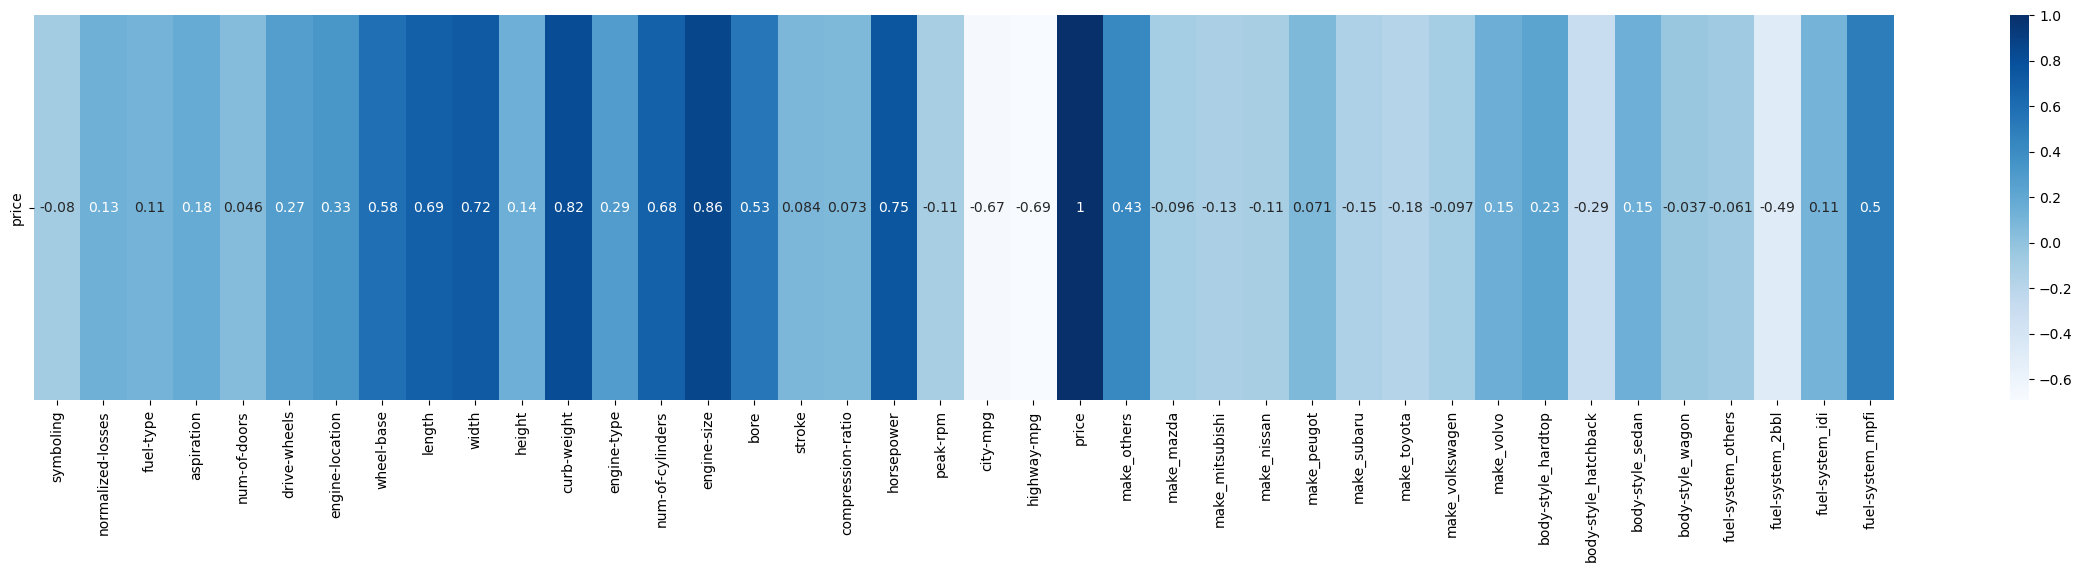

In [117]:
plt.figure(figsize=(30,5))
sns.heatmap(df.corr().head(23).tail(1),annot=True,cmap="Blues")

<AxesSubplot:>

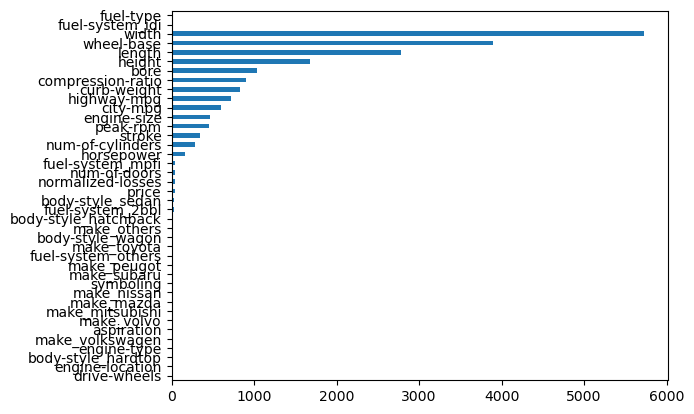

In [118]:
vif_lis = []

for i in range(df.shape[1]):
    vif = variance_inflation_factor(df,i)
    vif_lis.append(vif)
    
s = pd.Series(vif_lis,index=df.columns)
s.sort_values().plot(kind="barh")

In [119]:
model_details = []
Testing_accuracy = []
Training_accuracy = []
best_params_list = []

# Train-Test Model

In [120]:
x = df.drop("price",axis=1)
y = df["price"]

In [121]:
def train_test_split_fun(x,y,model_name):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "Linear Regression Regular Model"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [122]:
def model_training(x_train, y_train):
    linear_model = LinearRegression()
    linear_model.fit(x_train, y_train)
    return linear_model

linear_model = model_training(x_train,y_train)

In [123]:
def model_evalution_training(linear_model, x_train, y_train):
    
    y_pred_train = linear_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(linear_model, x_train, y_train)

Mean squared Error:  6965449.6430972265
Root Mean squared Error:  2639.2138304990044
Mean Absolute Error:  1918.0798237595895
r_squared_value for Training:  0.8962257086940218


In [124]:
def model_evalution_testing(linear_model, x_test, y_test):
    
    y_pred = linear_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(linear_model, x_test, y_test)

Mean squared Error:  5291885.700046881
Root Mean squared Error:  2300.4098982674545
Mean Absolute Error:  1686.0399410785194
r_squared_value for Testing:  0.8420539155713954


In [125]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [126]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 39)
(41, 39)
(164,)
(41,)


In [127]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [128]:
y_pred = model.predict(x_test)
y_pred

array([ 6553.52215223,  9149.62277701, 17941.81069875,  8516.9048437 ,
       12153.22284031, 17003.7353811 , 15111.81368046,  6016.12471035,
        9068.64267385,  7477.923286  , 12486.68578794, 18672.12894818,
        5244.10407112,  4433.85724455, 12537.1539824 , 16013.23129681,
        9773.53094526, 10157.85625839,  4917.34845011,  6123.59650645,
        7175.45411762,  7507.30958991,  4911.44229524,  7101.71234501,
       13803.50930214, 34254.77011748,  7055.4362354 ,  9440.38653127,
        7569.81395194, 11439.0039021 ,  8550.0134249 ,  9143.89501064,
       20049.23199959,  8698.92266992, 17395.85060633, 15758.54373002,
        6078.38561485,  6048.52657049,  9470.48489657, 10522.33370434,
        6351.20904643])

In [129]:
y_test

120     6229
185     8195
180    15690
119     7957
109    12440
104    17199
133    12170
89      5499
37      7895
34      7129
145    11259
65     18280
78      6669
152     6488
149    11694
66     18344
85      6989
173     8948
31      6855
91      6649
42     10345
41     12945
153     6918
54      7395
167     8449
48     35550
50      5195
158     7898
184     7995
144     9233
25      6692
55     10945
201    19045
2      16500
12     20970
197    16515
96      7499
22      6377
100     9549
39      8845
32      5399
Name: price, dtype: int32

In [130]:
residual = y_pred - y_test
residual

120     324.522152
185     954.622777
180    2251.810699
119     559.904844
109    -286.777160
104    -195.264619
133    2941.813680
89      517.124710
37     1173.642674
34      348.923286
145    1227.685788
65      392.128948
78    -1424.895929
152   -2054.142755
149     843.153982
66    -2330.768703
85     2784.530945
173    1209.856258
31    -1937.651550
91     -525.403494
42    -3169.545882
41    -5437.690410
153   -2006.557705
54     -293.287655
167    5354.509302
48    -1295.229883
50     1860.436235
158    1542.386531
184    -425.186048
144    2206.003902
25     1858.013425
55    -1801.104989
201    1004.232000
2     -7801.077330
12    -3574.149394
197    -756.456270
96    -1420.614385
22     -328.473430
100     -78.515103
39     1677.333704
32      952.209046
Name: price, dtype: float64

# Model Evalution

In [131]:
# Training Data

y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error: ",mae)

r_square = r2_score(y_train,y_pred_train)
print("r_squared_value for Training: ",r_square)


Mean Squared Error:  6965449.6430972265
Root Mean Squared Error:  2639.2138304990044
Mean Absolute Error:  1918.0798237595895
r_squared_value for Training:  0.8962257086940218


In [132]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",mae)

r_square = r2_score(y_test,y_pred)
print("r_squared_value for Training: ",r_square)

Mean Squared Error:  5291885.700046881
Root Mean Squared Error:  2300.4098982674545
Mean Absolute Error:  1686.0399410785194
r_squared_value for Training:  0.8420539155713954


# Normality of Residual

In [133]:
Residual = y_train - y_pred_train
Residual

154     1792.407736
74      5067.843487
179    -1660.331454
118    -1500.999799
16     14891.744131
           ...     
63     -2793.239099
70      1042.109907
81      -370.724254
11       758.574091
95      3076.850277
Name: price, Length: 164, dtype: float64

### 1. Kde



<AxesSubplot:xlabel='price', ylabel='Density'>

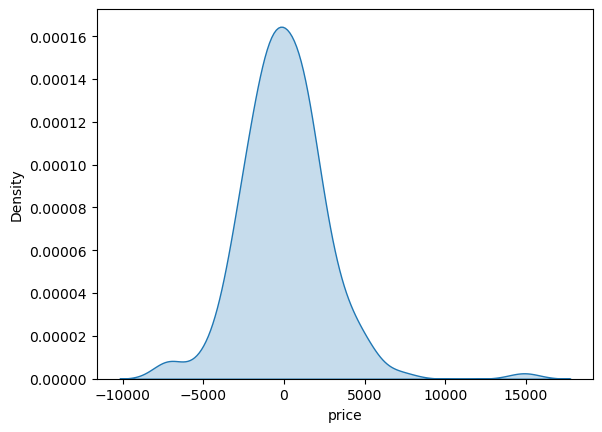

In [134]:
sns.kdeplot(Residual,fill=True)

### 2. Hypothesis Testing

### 2.1 USing Shepiro Test

In [135]:
_,p_val = shapiro(Residual)
p_val


1.065202468453208e-06

### 2.2 Normal Test

In [136]:
_, p_val = normaltest(Residual)
p_val

3.507867534026186e-11

### 2.3 Ks Test

In [137]:
_,p_val = kstest(Residual,"norm")
p_val

1.1223322591861413e-44

### 3. QQ Plot

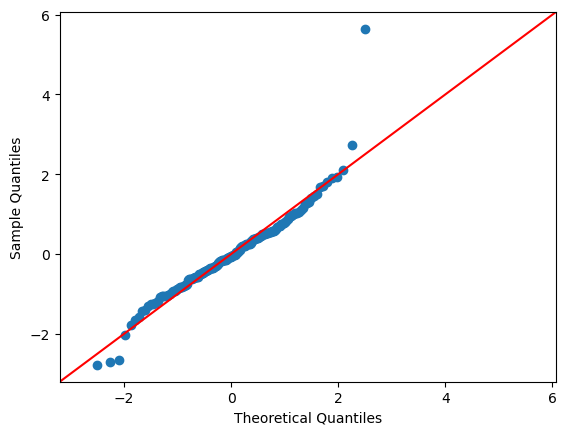

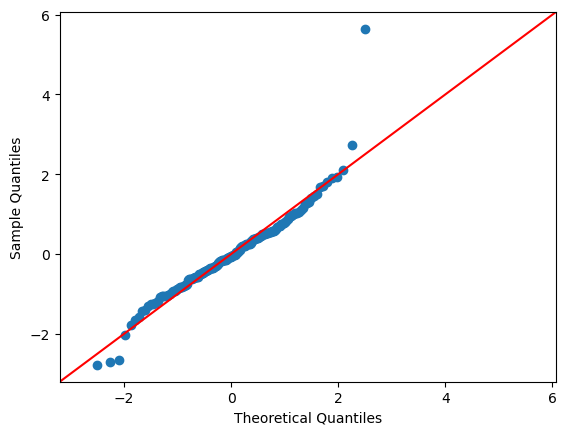

In [138]:
sm.qqplot(Residual,line="45",fit=True)

# Homoscaditity

<AxesSubplot:xlabel='price', ylabel='price'>

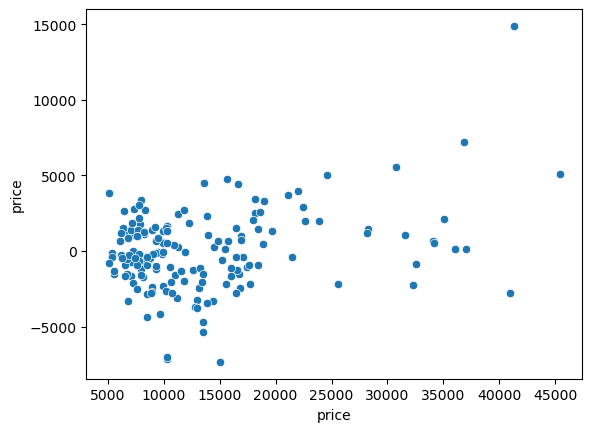

In [139]:
sns.scatterplot(x = y_train, y = Residual)

# Let's Handle the Outlier

In [140]:
df.head(5)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_volkswagen,make_volvo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_others,fuel-system_2bbl,fuel-system_idi,fuel-system_mpfi
0,3,122,0,0,2,1,0,88.6,168.8,64.1,...,0.0,0.0,0,0,0,0,0,0,0,1
1,3,122,0,0,2,1,0,88.6,168.8,64.1,...,0.0,0.0,0,0,0,0,0,0,0,1
2,1,122,0,0,2,1,0,94.5,171.2,65.5,...,0.0,0.0,0,1,0,0,0,0,0,1
3,2,164,0,0,4,0,0,99.8,176.6,66.2,...,0.0,0.0,0,0,1,0,0,0,0,1
4,2,164,0,0,4,4,0,99.4,176.6,66.4,...,0.0,0.0,0,0,1,0,0,0,0,1


### symboling

<AxesSubplot:xlabel='symboling'>

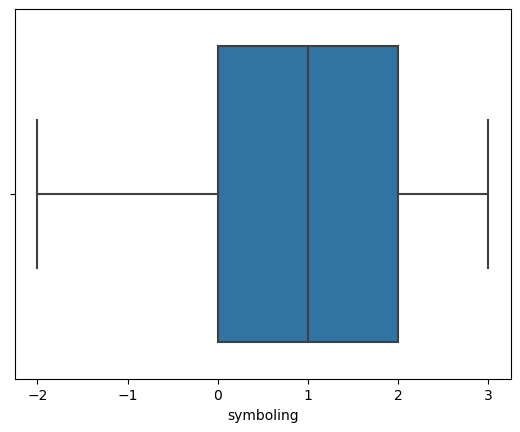

In [141]:
sns.boxplot(x = df["symboling"])

### normalized-losses

<AxesSubplot:xlabel='normalized-losses'>

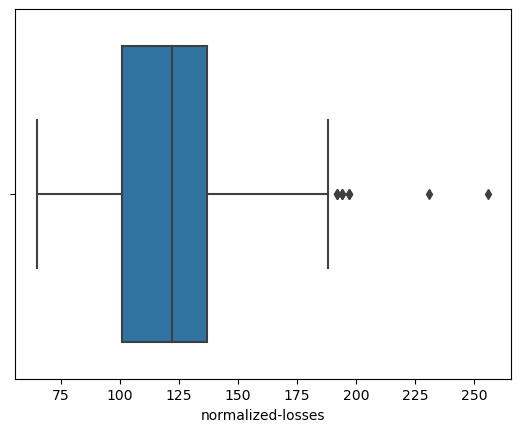

In [142]:
sns.boxplot(x = df["normalized-losses"])

In [143]:
q1 = df["normalized-losses"].quantile(0.25)
q2 = df["normalized-losses"].quantile(0.50)
q3 = df["normalized-losses"].quantile(0.75)

iqr = q3 - q1 

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("value of Q1:",q1)
print("value of Q2(Median):",q2)
print("value of Q3:",q3)
print("-"*50)
print("value of Iqr:",iqr)
print("-"*50)
print("value of Lower tail:",lower_tail)
print("value of Upper tail:",upper_tail)


value of Q1: 101.0
value of Q2(Median): 122.0
value of Q3: 137.0
--------------------------------------------------
value of Iqr: 36.0
--------------------------------------------------
value of Lower tail: 47.0
value of Upper tail: 191.0


In [144]:
df.loc[df["normalized-losses"] > upper_tail,"normalized-losses"] = upper_tail

In [145]:
df.loc[df["normalized-losses"] > upper_tail,"normalized-losses"]

Series([], Name: normalized-losses, dtype: int32)

<AxesSubplot:xlabel='normalized-losses'>

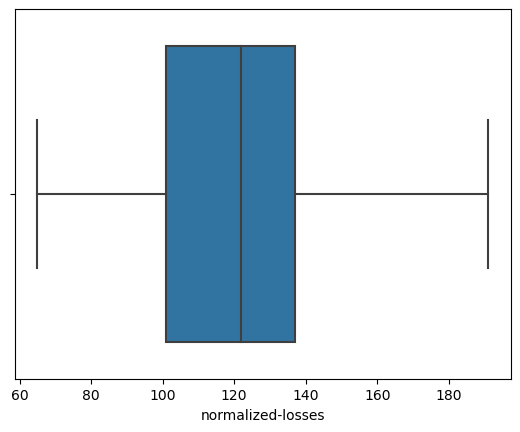

In [146]:
sns.boxplot(x = df["normalized-losses"])

### fuel-type

<AxesSubplot:xlabel='fuel-type'>

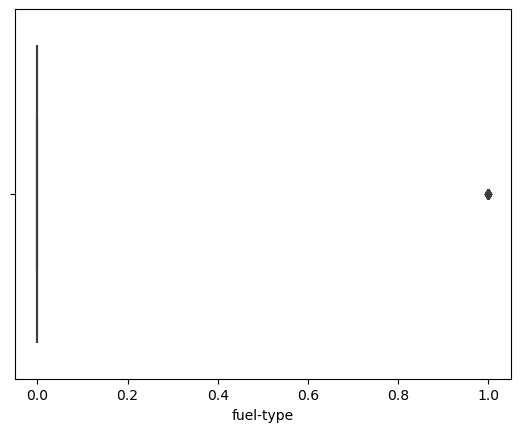

In [147]:
sns.boxplot(x = df["fuel-type"])

### aspiration

<AxesSubplot:xlabel='aspiration'>

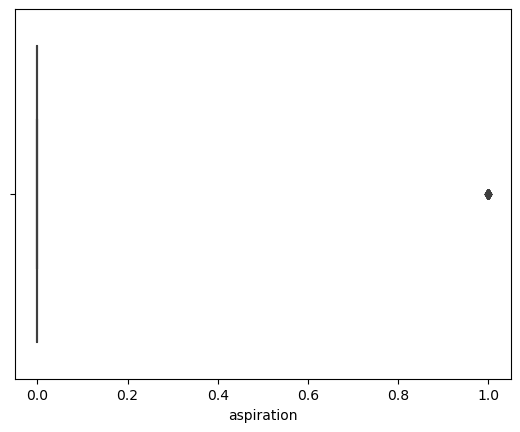

In [148]:
sns.boxplot(x = df["aspiration"])

### num-of-doors

<AxesSubplot:xlabel='num-of-doors'>

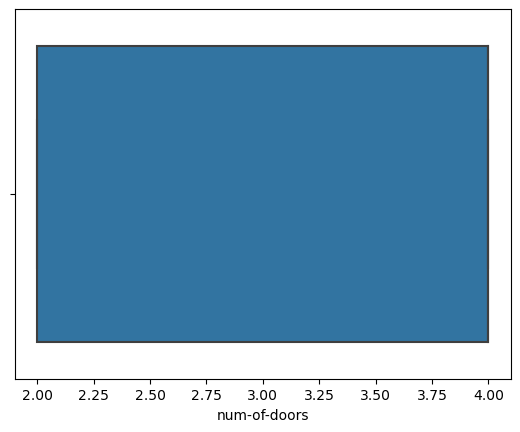

In [149]:
sns.boxplot(x = df["num-of-doors"])

In [150]:
df.head(5)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_volkswagen,make_volvo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_others,fuel-system_2bbl,fuel-system_idi,fuel-system_mpfi
0,3,122,0,0,2,1,0,88.6,168.8,64.1,...,0.0,0.0,0,0,0,0,0,0,0,1
1,3,122,0,0,2,1,0,88.6,168.8,64.1,...,0.0,0.0,0,0,0,0,0,0,0,1
2,1,122,0,0,2,1,0,94.5,171.2,65.5,...,0.0,0.0,0,1,0,0,0,0,0,1
3,2,164,0,0,4,0,0,99.8,176.6,66.2,...,0.0,0.0,0,0,1,0,0,0,0,1
4,2,164,0,0,4,4,0,99.4,176.6,66.4,...,0.0,0.0,0,0,1,0,0,0,0,1


### drive-wheels

<AxesSubplot:xlabel='drive-wheels'>

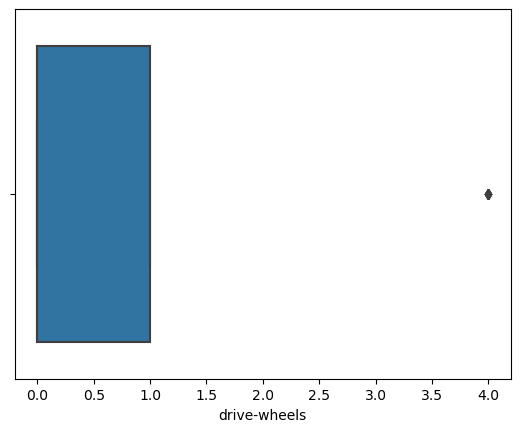

In [151]:
sns.boxplot(x = df["drive-wheels"])

In [152]:
q1 = df["drive-wheels"].quantile(0.25)
q2 = df["drive-wheels"].quantile(0.50)
q3 = df["drive-wheels"].quantile(0.75)

iqr = q3 - q1 

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("value of Q1:",q1)
print("value of Q2(Median):",q2)
print("value of Q3:",q3)
print("-"*50)
print("value of Iqr:",iqr)
print("-"*50)
print("value of Lower tail:",lower_tail)
print("value of Upper tail:",upper_tail)

value of Q1: 0.0
value of Q2(Median): 0.0
value of Q3: 1.0
--------------------------------------------------
value of Iqr: 1.0
--------------------------------------------------
value of Lower tail: -1.5
value of Upper tail: 2.5


In [153]:
df.loc[df["drive-wheels"] > upper_tail,"drive-wheels"]

4      4
9      4
140    4
144    4
145    4
148    4
149    4
154    4
155    4
Name: drive-wheels, dtype: int64

### engine-location

<AxesSubplot:xlabel='engine-location'>

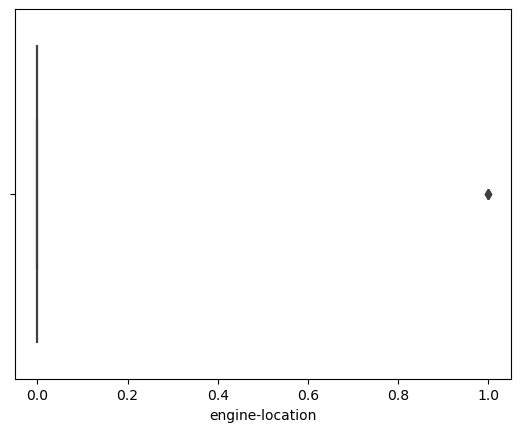

In [154]:
sns.boxplot(x = df["engine-location"])

### wheel-base

<AxesSubplot:xlabel='wheel-base'>

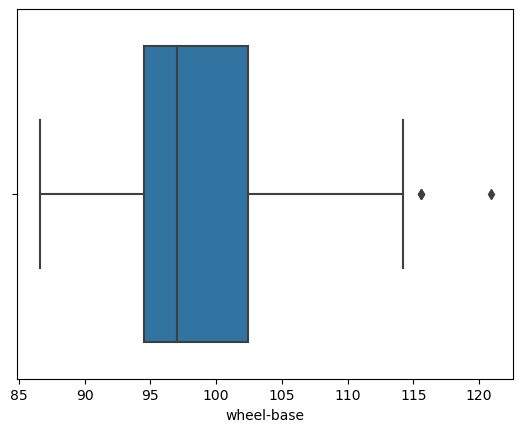

In [155]:
sns.boxplot(x = df["wheel-base"])

In [156]:
q1 = df["wheel-base"].quantile(0.25)
q2 = df["wheel-base"].quantile(0.50)
q3 = df["wheel-base"].quantile(0.75)

iqr = q3 - q1 

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("value of Q1:",q1)
print("value of Q2(Median):",q2)
print("value of Q3:",q3)
print("-"*50)
print("value of Iqr:",iqr)
print("-"*50)
print("value of Lower tail:",lower_tail)
print("value of Upper tail:",upper_tail)

value of Q1: 94.5
value of Q2(Median): 97.0
value of Q3: 102.4
--------------------------------------------------
value of Iqr: 7.900000000000006
--------------------------------------------------
value of Lower tail: 82.64999999999999
value of Upper tail: 114.25000000000001


In [157]:
df.loc[df["wheel-base"] > upper_tail,"wheel-base"] = upper_tail

In [158]:
df.loc[df["wheel-base"] > upper_tail,"wheel-base"]

Series([], Name: wheel-base, dtype: float64)

<AxesSubplot:xlabel='wheel-base'>

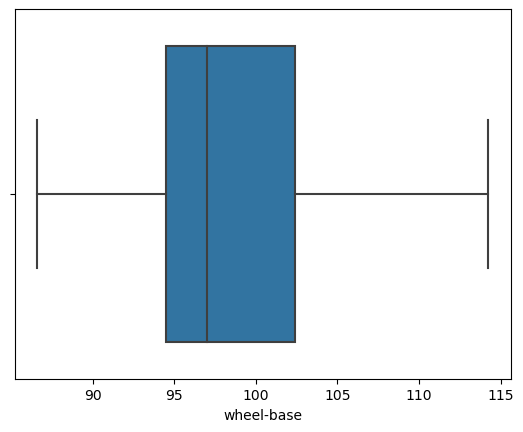

In [159]:
sns.boxplot(x = df["wheel-base"])

### length

<AxesSubplot:xlabel='length'>

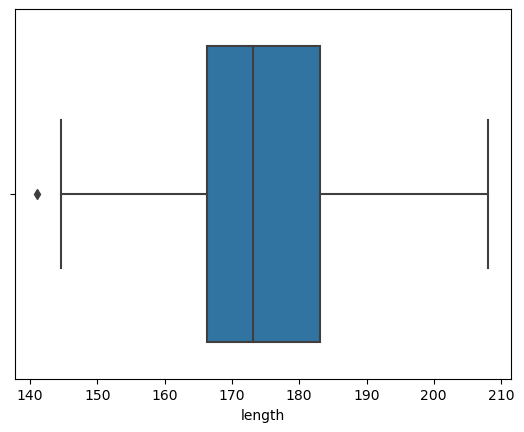

In [160]:
sns.boxplot(x = df["length"])

In [161]:
q1 = df["length"].quantile(0.25)
q2 = df["length"].quantile(0.50)
q3 = df["length"].quantile(0.75)

iqr = q3 - q1 

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("value of Q1:",q1)
print("value of Q2(Median):",q2)
print("value of Q3:",q3)
print("-"*50)
print("value of Iqr:",iqr)
print("-"*50)
print("value of Lower tail:",lower_tail)
print("value of Upper tail:",upper_tail)

value of Q1: 166.3
value of Q2(Median): 173.2
value of Q3: 183.1
--------------------------------------------------
value of Iqr: 16.799999999999983
--------------------------------------------------
value of Lower tail: 141.10000000000002
value of Upper tail: 208.29999999999995


In [162]:
df.loc[df["length"] < lower_tail,"length"] = lower_tail

In [163]:
df.loc[df["length"] < lower_tail,"length"] 

Series([], Name: length, dtype: float64)

<AxesSubplot:xlabel='length'>

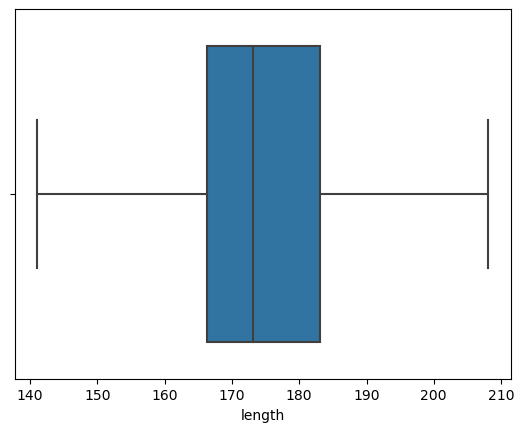

In [164]:
sns.boxplot(x = df["length"])

### width

<AxesSubplot:xlabel='width'>

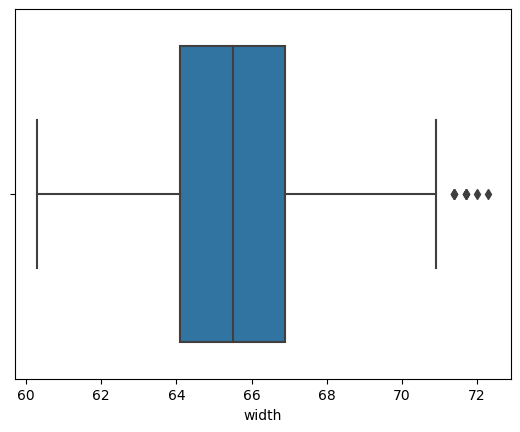

In [165]:
sns.boxplot(x = df["width"])

In [166]:
q1 = df["width"].quantile(0.25)
q2 = df["width"].quantile(0.50)
q3 = df["width"].quantile(0.75)

iqr = q3 - q1 

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("value of Q1:",q1)
print("value of Q2(Median):",q2)
print("value of Q3:",q3)
print("-"*50)
print("value of Iqr:",iqr)
print("-"*50)
print("value of Lower tail:",lower_tail)
print("value of Upper tail:",upper_tail)

value of Q1: 64.1
value of Q2(Median): 65.5
value of Q3: 66.9
--------------------------------------------------
value of Iqr: 2.8000000000000114
--------------------------------------------------
value of Lower tail: 59.89999999999998
value of Upper tail: 71.10000000000002


In [167]:
df.loc[df["width"] > upper_tail,"width"] = upper_tail

In [168]:
df.loc[df["width"] > upper_tail,"width"]

Series([], Name: width, dtype: float64)

<AxesSubplot:xlabel='width'>

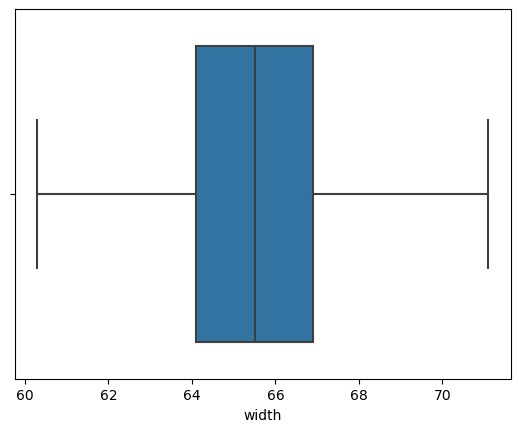

In [169]:
sns.boxplot(x = df["width"])

### height

<AxesSubplot:xlabel='height'>

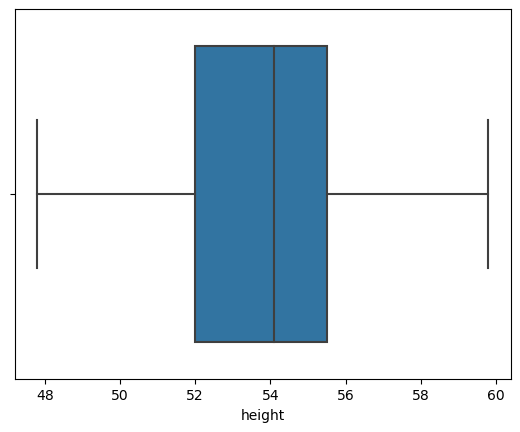

In [170]:
sns.boxplot(x = df["height"])

### curb-weight

<AxesSubplot:xlabel='curb-weight'>

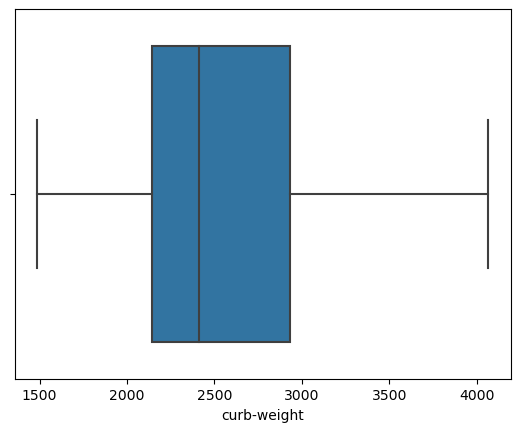

In [171]:
sns.boxplot(x = df["curb-weight"])

### engine-type

<AxesSubplot:xlabel='engine-type'>

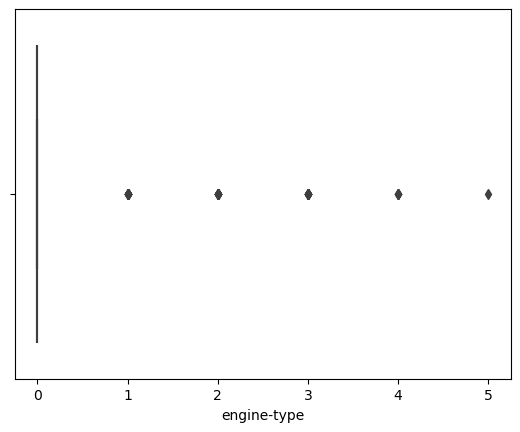

In [172]:
sns.boxplot(x = df["engine-type"])

### num-of-cylinders

<AxesSubplot:xlabel='num-of-cylinders'>

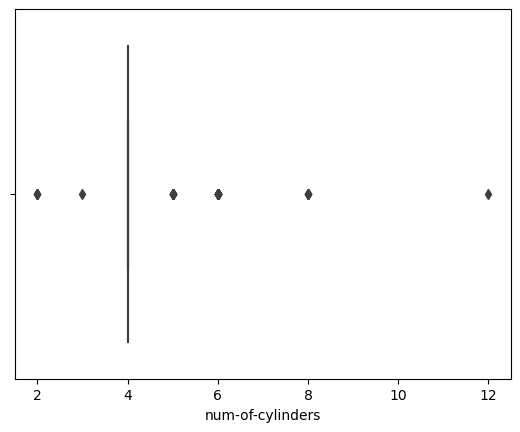

In [173]:
sns.boxplot(x = df["num-of-cylinders"])

### engine-size

<AxesSubplot:xlabel='engine-size'>

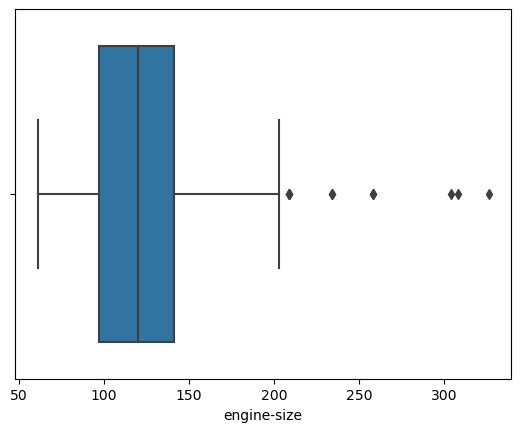

In [174]:
sns.boxplot(x = df["engine-size"])

In [175]:
q1 = df["engine-size"].quantile(0.25)
q2 = df["engine-size"].quantile(0.50)
q3 = df["engine-size"].quantile(0.75)

iqr = q3 - q1 

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("value of Q1:",q1)
print("value of Q2(Median):",q2)
print("value of Q3:",q3)
print("-"*50)
print("value of Iqr:",iqr)
print("-"*50)
print("value of Lower tail:",lower_tail)
print("value of Upper tail:",upper_tail)

value of Q1: 97.0
value of Q2(Median): 120.0
value of Q3: 141.0
--------------------------------------------------
value of Iqr: 44.0
--------------------------------------------------
value of Lower tail: 31.0
value of Upper tail: 207.0


In [176]:
df.loc[df["engine-size"] > upper_tail,"engine-size"] = upper_tail

In [177]:
df.loc[df["engine-size"] > upper_tail,"engine-size"]

Series([], Name: engine-size, dtype: int64)

<AxesSubplot:xlabel='engine-size'>

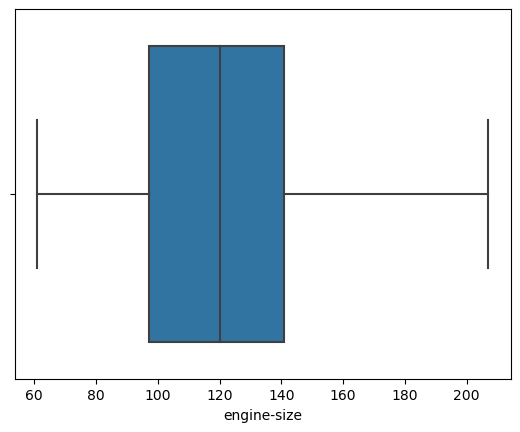

In [178]:
sns.boxplot(x = df["engine-size"])

### bore

<AxesSubplot:xlabel='bore'>

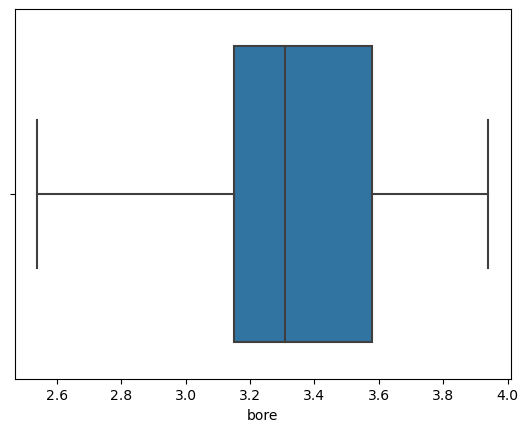

In [179]:
sns.boxplot(x = df["bore"])

### stroke

<AxesSubplot:xlabel='stroke'>

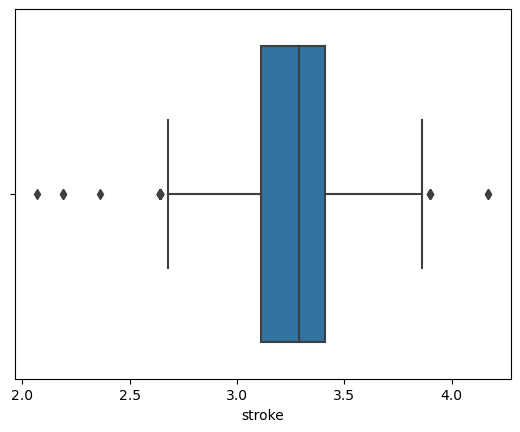

In [180]:
sns.boxplot(x = df["stroke"])

In [181]:
q1 = df["stroke"].quantile(0.25)
q2 = df["stroke"].quantile(0.50)
q3 = df["stroke"].quantile(0.75)

iqr = q3 - q1 

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("value of Q1:",q1)
print("value of Q2(Median):",q2)
print("value of Q3:",q3)
print("-"*50)
print("value of Iqr:",iqr)
print("-"*50)
print("value of Lower tail:",lower_tail)
print("value of Upper tail:",upper_tail)

value of Q1: 3.11
value of Q2(Median): 3.29
value of Q3: 3.41
--------------------------------------------------
value of Iqr: 0.30000000000000027
--------------------------------------------------
value of Lower tail: 2.6599999999999993
value of Upper tail: 3.8600000000000003


In [182]:
df.loc[df["stroke"] > upper_tail,"stroke"] = upper_tail

In [183]:
df.loc[df["stroke"] > upper_tail,"stroke"]

Series([], Name: stroke, dtype: float64)

In [184]:
df.loc[df["stroke"] < lower_tail,"stroke"] = lower_tail

In [185]:
df.loc[df["stroke"] < lower_tail,"stroke"]

Series([], Name: stroke, dtype: float64)

<AxesSubplot:xlabel='stroke'>

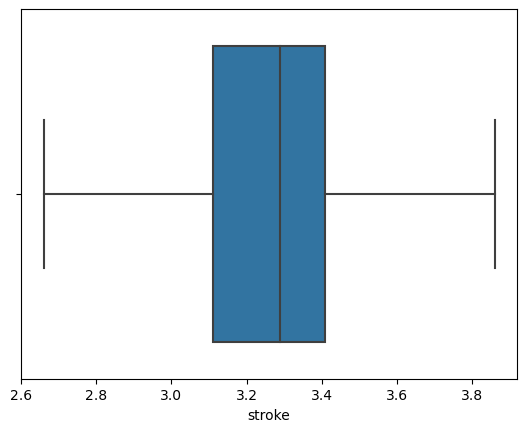

In [186]:
sns.boxplot(x = df["stroke"])

### compression-ratio

<AxesSubplot:xlabel='compression-ratio'>

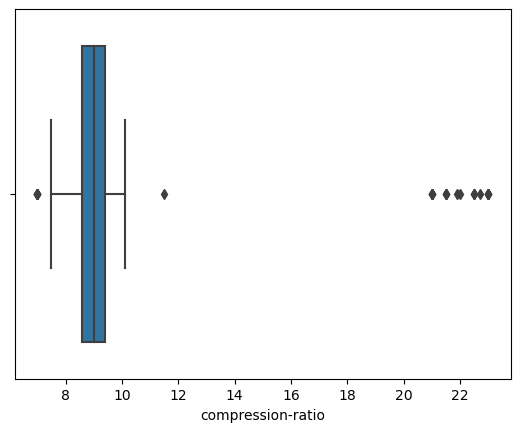

In [187]:
sns.boxplot(x = df["compression-ratio"])

In [188]:
q1 = df["compression-ratio"].quantile(0.25)
q2 = df["compression-ratio"].quantile(0.50)
q3 = df["compression-ratio"].quantile(0.75)

iqr = q3 - q1 

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("value of Q1:",q1)
print("value of Q2(Median):",q2)
print("value of Q3:",q3)
print("-"*50)
print("value of Iqr:",iqr)
print("-"*50)
print("value of Lower tail:",lower_tail)
print("value of Upper tail:",upper_tail)

value of Q1: 8.6
value of Q2(Median): 9.0
value of Q3: 9.4
--------------------------------------------------
value of Iqr: 0.8000000000000007
--------------------------------------------------
value of Lower tail: 7.399999999999999
value of Upper tail: 10.600000000000001


In [189]:
df.loc[df["compression-ratio"] > upper_tail,"compression-ratio"] = upper_tail

In [190]:
df.loc[df["compression-ratio"] > upper_tail,"compression-ratio"]

Series([], Name: compression-ratio, dtype: float64)

In [191]:
df.loc[df["compression-ratio"] < lower_tail,"compression-ratio"] = lower_tail

In [192]:
df.loc[df["compression-ratio"] < lower_tail,"compression-ratio"]

Series([], Name: compression-ratio, dtype: float64)

<AxesSubplot:xlabel='compression-ratio'>

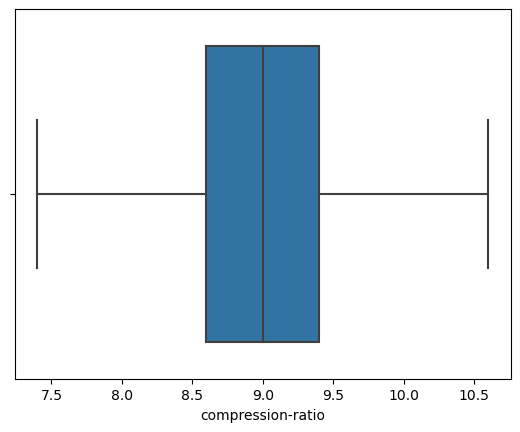

In [193]:
sns.boxplot(x = df["compression-ratio"])

### horsepower

<AxesSubplot:xlabel='horsepower'>

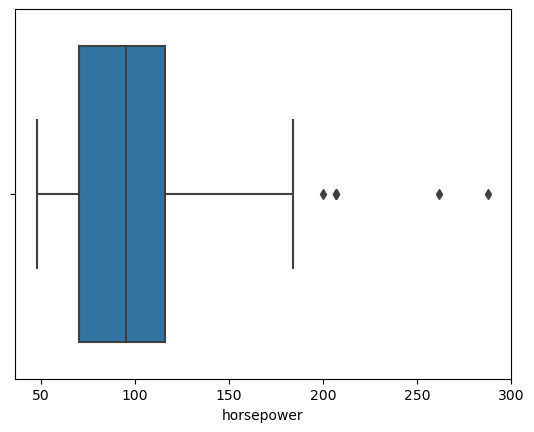

In [194]:
sns.boxplot(x = df["horsepower"])

In [195]:
q1 = df["horsepower"].quantile(0.25)
q2 = df["horsepower"].quantile(0.50)
q3 = df["horsepower"].quantile(0.75)

iqr = q3 - q1 

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("value of Q1:",q1)
print("value of Q2(Median):",q2)
print("value of Q3:",q3)
print("-"*50)
print("value of Iqr:",iqr)
print("-"*50)
print("value of Lower tail:",lower_tail)
print("value of Upper tail:",upper_tail)

value of Q1: 70.0
value of Q2(Median): 95.0
value of Q3: 116.0
--------------------------------------------------
value of Iqr: 46.0
--------------------------------------------------
value of Lower tail: 1.0
value of Upper tail: 185.0


In [196]:
df.loc[df["horsepower"] > upper_tail,"horsepower"] = upper_tail

In [197]:
df.loc[df["horsepower"] > upper_tail,"horsepower"]

Series([], Name: horsepower, dtype: float64)

### peak-rpm

<AxesSubplot:xlabel='peak-rpm'>

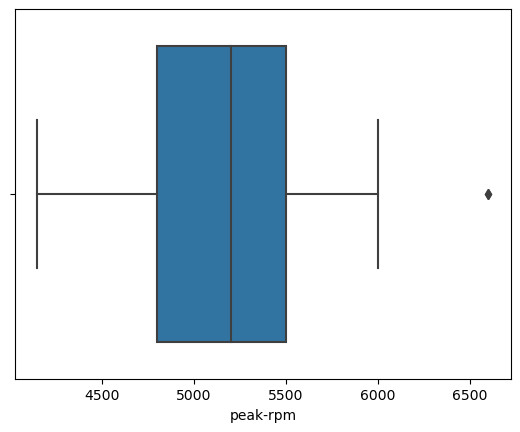

In [198]:
sns.boxplot(x = df["peak-rpm"])

In [199]:
q1 = df["peak-rpm"].quantile(0.25)
q2 = df["peak-rpm"].quantile(0.50)
q3 = df["peak-rpm"].quantile(0.75)

iqr = q3 - q1 

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("value of Q1:",q1)
print("value of Q2(Median):",q2)
print("value of Q3:",q3)
print("-"*50)
print("value of Iqr:",iqr)
print("-"*50)
print("value of Lower tail:",lower_tail)
print("value of Upper tail:",upper_tail)

value of Q1: 4800.0
value of Q2(Median): 5200.0
value of Q3: 5500.0
--------------------------------------------------
value of Iqr: 700.0
--------------------------------------------------
value of Lower tail: 3750.0
value of Upper tail: 6550.0


In [200]:
df.loc[df["peak-rpm"] > upper_tail,"peak-rpm"] = upper_tail

In [201]:
df.loc[df["peak-rpm"] > upper_tail,"peak-rpm"] 

Series([], Name: peak-rpm, dtype: int32)

<AxesSubplot:xlabel='peak-rpm'>

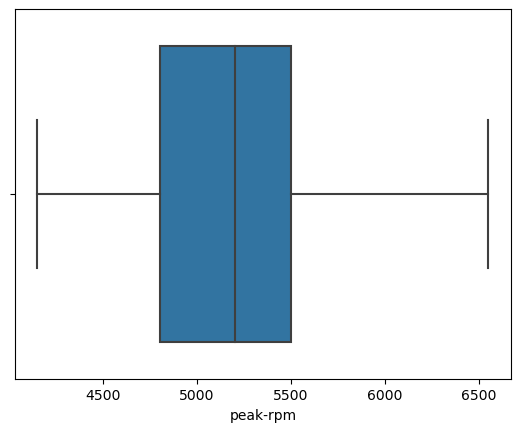

In [202]:
sns.boxplot(x = df["peak-rpm"])

### city-mpg

<AxesSubplot:xlabel='city-mpg'>

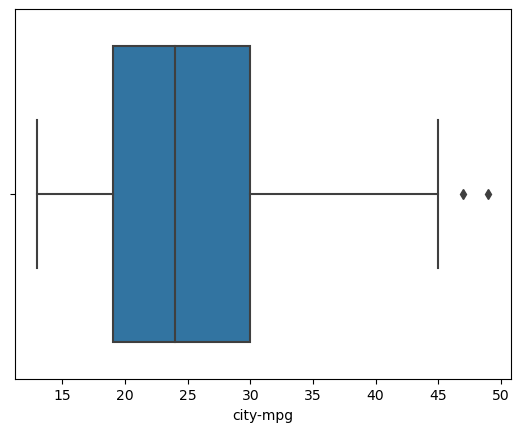

In [203]:
sns.boxplot(x = df["city-mpg"])

In [204]:
q1 = df["city-mpg"].quantile(0.25)
q2 = df["city-mpg"].quantile(0.50)
q3 = df["city-mpg"].quantile(0.75)

iqr = q3 - q1 

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("value of Q1:",q1)
print("value of Q2(Median):",q2)
print("value of Q3:",q3)
print("-"*50)
print("value of Iqr:",iqr)
print("-"*50)
print("value of Lower tail:",lower_tail)
print("value of Upper tail:",upper_tail)

value of Q1: 19.0
value of Q2(Median): 24.0
value of Q3: 30.0
--------------------------------------------------
value of Iqr: 11.0
--------------------------------------------------
value of Lower tail: 2.5
value of Upper tail: 46.5


In [205]:
df.loc[df["city-mpg"] > upper_tail,"city-mpg"] = upper_tail

In [206]:
df.loc[df["city-mpg"] > upper_tail,"city-mpg"]

Series([], Name: city-mpg, dtype: float64)

<AxesSubplot:xlabel='city-mpg'>

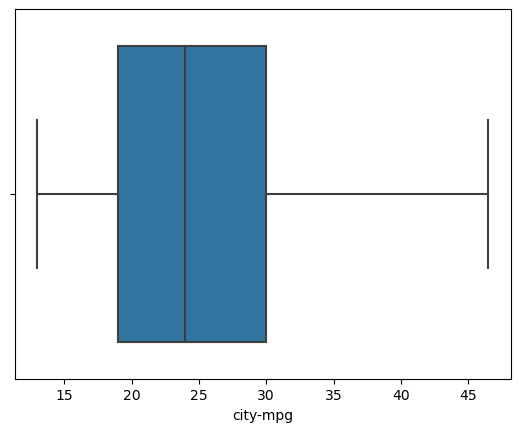

In [207]:
sns.boxplot(x = df["city-mpg"])

### highway-mpg

<AxesSubplot:xlabel='highway-mpg'>

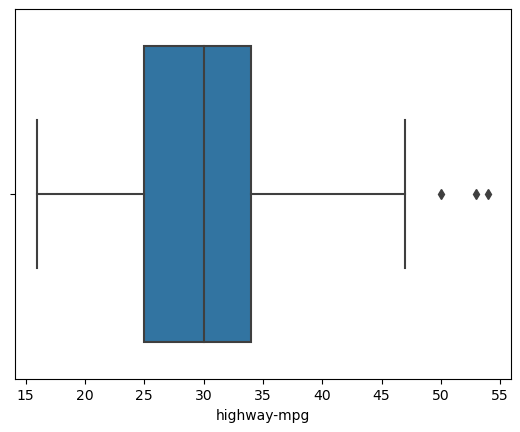

In [208]:
sns.boxplot(x = df["highway-mpg"])

In [209]:
q1 = df["highway-mpg"].quantile(0.25)
q2 = df["highway-mpg"].quantile(0.50)
q3 = df["highway-mpg"].quantile(0.75)

iqr = q3 - q1 

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("value of Q1:",q1)
print("value of Q2(Median):",q2)
print("value of Q3:",q3)
print("-"*50)
print("value of Iqr:",iqr)
print("-"*50)
print("value of Lower tail:",lower_tail)
print("value of Upper tail:",upper_tail)

value of Q1: 25.0
value of Q2(Median): 30.0
value of Q3: 34.0
--------------------------------------------------
value of Iqr: 9.0
--------------------------------------------------
value of Lower tail: 11.5
value of Upper tail: 47.5


In [210]:
df.loc[df["highway-mpg"] > upper_tail,"highway-mpg"] = upper_tail

In [211]:
df.loc[df["highway-mpg"] > upper_tail,"highway-mpg"] 

Series([], Name: highway-mpg, dtype: float64)

<AxesSubplot:xlabel='highway-mpg'>

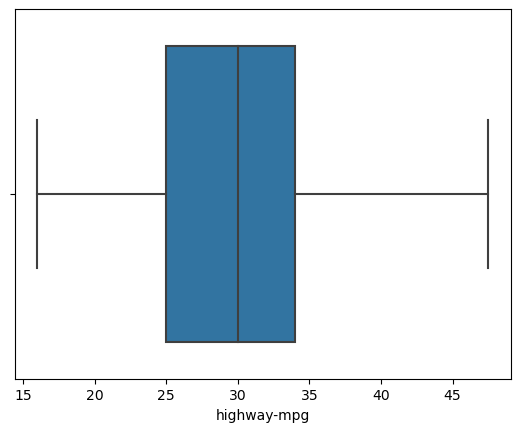

In [212]:
sns.boxplot(x = df["highway-mpg"])

# Again Training our model

# Train-Test Model

In [213]:
x = df.drop("price",axis=1)
y = df["price"]

In [214]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=101)

In [215]:
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(164, 39)
(41, 39)
(164,)
(41,)


In [216]:
model1 = LinearRegression()
model1.fit(x_train1,y_train1)

LinearRegression()

In [217]:
y_pred1 = model1.predict(x_test1)
y_pred1

array([ 5951.63617243,  8150.99349157, 18712.384047  ,  7139.10083744,
       15480.79784621, 16686.1295971 , 16678.45262766,  4997.2597418 ,
        8174.79927086,  7620.16359226, 10037.30262225, 20331.66025798,
        4419.20615161,  4596.49078889, 11774.20190623, 16822.43970787,
        9837.04863568, 10014.70515625,  2820.88287309,  5183.27185995,
       11140.14155464,  9729.77537274,  4337.38844762,  7214.86460749,
       13695.40098294, 32740.33052374,  8540.32679944, 11087.72017243,
        9014.21199041, 11950.40224095,  7996.97081339,  9261.16951434,
       21602.43513188, 11627.38204498, 17456.37600024, 14985.19942466,
        5665.59167681,  5013.34407055,  9823.27689377,  9967.62747046,
        7143.18930766])

In [218]:
y_test1

120     6229
185     8195
180    15690
119     7957
109    12440
104    17199
133    12170
89      5499
37      7895
34      7129
145    11259
65     18280
78      6669
152     6488
149    11694
66     18344
85      6989
173     8948
31      6855
91      6649
42     10345
41     12945
153     6918
54      7395
167     8449
48     35550
50      5195
158     7898
184     7995
144     9233
25      6692
55     10945
201    19045
2      16500
12     20970
197    16515
96      7499
22      6377
100     9549
39      8845
32      5399
Name: price, dtype: int32

In [219]:
residual = y_pred1 - y_test1
residual

120    -277.363828
185     -44.006508
180    3022.384047
119    -817.899163
109    3040.797846
104    -512.870403
133    4508.452628
89     -501.740258
37      279.799271
34      491.163592
145   -1221.697378
65     2051.660258
78    -2249.793848
152   -1891.509211
149      80.201906
66    -1521.560292
85     2848.048636
173    1066.705156
31    -4034.117127
91    -1465.728140
42      795.141555
41    -3215.224627
153   -2580.611552
54     -180.135393
167    5246.400983
48    -2809.669476
50     3345.326799
158    3189.720172
184    1019.211990
144    2717.402241
25     1304.970813
55    -1683.830486
201    2557.435132
2     -4872.617955
12    -3513.624000
197   -1529.800575
96    -1833.408323
22    -1363.655929
100     274.276894
39     1122.627470
32     1744.189308
Name: price, dtype: float64

# Model Evalution

In [220]:
# Training Data

y_pred_train1 = model1.predict(x_train1)

mse = mean_squared_error(y_train1,y_pred_train1)
print("Mean Squared Error: ",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae = mean_absolute_error(y_train1,y_pred_train1)
print("Mean Absolute Error: ",mae)

r_square = r2_score(y_train1,y_pred_train1)
print("r_squared_value for Training: ",r_square)


Mean Squared Error:  7055308.816743332
Root Mean Squared Error:  2656.1831293687815
Mean Absolute Error:  1955.0167248892546
r_squared_value for Training:  0.8948869477323793


In [221]:
mse = mean_squared_error(y_test1,y_pred1)
print("Mean Squared Error: ",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae = mean_absolute_error(y_test1,y_pred1)
print("Mean Absolute Error: ",mae)

r_square = r2_score(y_test1,y_pred1)
print("r_squared_value for Training: ",r_square)

Mean Squared Error:  5526808.5756095555
Root Mean Squared Error:  2350.9165394819006
Mean Absolute Error:  1922.6044188032001
r_squared_value for Training:  0.835042209264605


# Now Preforming Hyperparameter Testing

## 1. Ridge Regression Model

### 1. Grid-SearchCV

In [222]:
def get_best_estimator(x_train, y_train):
    
    Ridge_model = Ridge()
    
    # param_grid
    param_grid = {"alpha":np.arange(0.01,3,0.1)}
    
    gscv_ridge_model = GridSearchCV(Ridge_model,param_grid,n_jobs=-1)
    gscv_ridge_model.fit(x_train,y_train)
    gscv_ridge_model.best_estimator_
    
    model_details.append("Ridge Regression Hyperp Tunning GSCV")
    
    best_params = gscv_ridge_model.best_params_
    best_params_list.append(best_params)
    
    return gscv_ridge_model.best_estimator_


best_params = get_best_estimator(x_train, y_train)


In [223]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    ridge_reg_model = best_params
    
    y_pred = ridge_reg_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  4247536.176195434
Root Mean squared Error:  2060.95516113171
Mean Absolute Error:  1546.3163252705183
r_squared_value for Testing:  0.873224452392656


In [224]:
def get_hyp_training_accuracy(best_params, x_train, y_train):
    
    # To get best model from hyperparameter tunning
    ridge_reg_model = best_params
    
    y_pred_train = ridge_reg_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(best_params, x_train, y_train)
    

Mean squared Error:  6991873.7369875
Root Mean squared Error:  2644.2151457450473
Mean Absolute Error:  1930.734484742644
r_squared_value for Training:  0.8958320310770164


### 2.Randomize SearchCV 

In [225]:
def get_best_estimator(x_train, y_train):
    
    Ridge_model = Ridge()
    
    # param_grid
    param_grid = {"alpha":np.arange(0.01,3,0.1)}
    
    rscv_ridge_model = RandomizedSearchCV(Ridge_model,param_grid,n_jobs=-1)
    rscv_ridge_model.fit(x_train,y_train)
    rscv_ridge_model.best_estimator_
    
    model_details.append("Ridge Regression Hyperp Tunning RSCV")
    
    best_params = rscv_ridge_model.best_params_
    best_params_list.append(best_params)
    
    return rscv_ridge_model.best_estimator_


best_params = get_best_estimator(x_train, y_train)


In [226]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    Ridge_model = best_params
    
    y_pred = Ridge_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  5032683.570125281
Root Mean squared Error:  2243.364341814606
Mean Absolute Error:  1657.5246965399238
r_squared_value for Testing:  0.8497902809838813


In [227]:
def get_hyp_training_accuracy(best_params, x_train, y_train):
    
    # To get best model from hyperparameter tunning
    Ridge_model = best_params
    
    y_pred_train = Ridge_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(best_params, x_train, y_train)
    

Mean squared Error:  6966070.885506956
Root Mean squared Error:  2639.331522470596
Mean Absolute Error:  1918.8227076835465
r_squared_value for Training:  0.8962164531550254


## Lasso Regreration Model

### 1. Grid-SearchCV

In [228]:
Lasso_model = Lasso()

In [229]:
def get_best_estimator(x_train, y_train):
    
    # param_grid
    param_grid = {"alpha":np.arange(0.01,3,0.1)}
    
    grid_searchcv_lasso_model = GridSearchCV(Lasso_model,param_grid,n_jobs=-1)
    grid_searchcv_lasso_model.fit(x_train,y_train)
    grid_searchcv_lasso_model.best_estimator_
    
    model_details.append("Lasso Regression Hyperp Tunning GSCV")
    
    best_params = grid_searchcv_lasso_model.best_params_
    best_params_list.append(best_params)
    
    return grid_searchcv_lasso_model.best_estimator_

best_params = get_best_estimator(x_train, y_train)

In [230]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    Lasso_model = best_params
    
    y_pred = Lasso_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  3796581.225788245
Root Mean squared Error:  1948.4817745589116
Mean Absolute Error:  1470.8418092264308
r_squared_value for Testing:  0.886684034233186


In [231]:
def get_hyp_training_accuracy(best_params, x_train, y_train):
    
    # To get best model from hyperparameter tunning
    Lasso_model = best_params
    
    y_pred_train = Lasso_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending testing accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(best_params, x_train, y_train)

Mean squared Error:  7005903.465542485
Root Mean squared Error:  2646.8667260635707
Mean Absolute Error:  1925.9987500952848
r_squared_value for Training:  0.8956230100930729


### 2.Randomize SearchCV 

In [232]:
def get_best_estimator(x_train, y_train):
    
    Lasso_model = Lasso()
    
    # param_grid
    param_grid = {"alpha":np.arange(0.01,3,0.1)}
    
    random_searchcv_lasso_model = RandomizedSearchCV(Lasso_model,param_grid,n_jobs=-1)
    random_searchcv_lasso_model.fit(x_train,y_train)
    random_searchcv_lasso_model.best_estimator_
    
    model_details.append("Lasso Regression Hyperp Tunning RSCV")
    
    best_params = random_searchcv_lasso_model.best_params_
    best_params_list.append(best_params)
    
    return random_searchcv_lasso_model.best_estimator_

best_params = get_best_estimator(x_train, y_train)

In [233]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    Lasso_model = best_params
    
    y_pred = Lasso_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  3801374.704812567
Root Mean squared Error:  1949.7114414221833
Mean Absolute Error:  1473.0021011151314
r_squared_value for Testing:  0.8865409640148183


In [234]:
def get_hyp_training_accuracy(best_params, x_train, y_train):
    
    # To get best model from hyperparameter tunning
    Lasso_model = best_params
    
    y_pred_train = Lasso_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending testing accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(best_params, x_train, y_train)

Mean squared Error:  7004697.493106582
Root Mean squared Error:  2646.6389049333084
Mean Absolute Error:  1925.505148306961
r_squared_value for Training:  0.8956409771937316


# KNN Regression

In [235]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "KNN Regressor Regular Model"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [236]:
def model_training(x_train, y_train):
    knn_regg = KNeighborsRegressor()
    knn_regg.fit(x_train, y_train)
    return knn_regg

knn_regg = model_training(x_train,y_train)

In [237]:
def model_evalution_training(knn_regg, x_train, y_train):
    
    y_pred_train = knn_regg.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(knn_regg, x_train, y_train)

Mean squared Error:  9306046.244705882
Root Mean squared Error:  3050.5812961968218
Mean Absolute Error:  1733.233986928105
r_squared_value for Training:  0.849705631860568


In [238]:
def model_evalution_testing(knn_regg, x_test, y_test):
    
    y_pred = knn_regg.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(knn_regg, x_test, y_test)

Mean squared Error:  20143894.625384618
Root Mean squared Error:  4488.19502978476
Mean Absolute Error:  2842.7884615384614
r_squared_value for Testing:  0.6691974143595569


# Scaling

### Standardization

In [239]:
std_scalar = StandardScaler()

In [240]:
x_train_exctracted = x_train[["normalized-losses","wheel-base","length","length","height","curb-weight","engine-size",
                              "bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg"]]

std_scalar.fit(x_train_exctracted) 

array = std_scalar.transform(x_train_exctracted)

scaled_df = pd.DataFrame(array, columns=x_train_exctracted.columns, index = x_train_exctracted.index)

x_train_remaining = x_train.drop(["normalized-losses","wheel-base","length","length","height","curb-weight","engine-size",
                              "bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg"], axis= 1)

a_df = scaled_df.join(x_train_remaining)

x_train_scaled_df = a_df[x_train.columns]

In [241]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "KNN Regressor Using Standardization"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [242]:
def model_training(x_train_scaled_df, y_train):
    knn_regg_scaled = KNeighborsRegressor()
    knn_regg_scaled.fit(x_train_scaled_df, y_train)
    return knn_regg_scaled

knn_regg_scaled = model_training(x_train_scaled_df,y_train)

In [243]:
def model_evalution_training(knn_regg_scaled, x_train_scaled_df, y_train):
    
    y_pred_train = knn_regg_scaled.predict(x_train_scaled_df)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(knn_regg_scaled, x_train_scaled_df, y_train)

Mean squared Error:  9081749.634509802
Root Mean squared Error:  3013.594138982521
Mean Absolute Error:  1833.422222222222
r_squared_value for Training:  0.8533280636021268


In [244]:
x_test_exctracted = x_test[["normalized-losses","wheel-base","length","length","height","curb-weight","engine-size",
                              "bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg"]]

std_scalar.fit(x_test_exctracted) 

array = std_scalar.transform(x_test_exctracted)

scaled_df = pd.DataFrame(array, columns=x_test_exctracted.columns, index = x_test_exctracted.index)

x_test_remaining = x_test.drop(["normalized-losses","wheel-base","length","length","height","curb-weight","engine-size",
                              "bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg"], axis= 1)

a_df = scaled_df.join(x_test_remaining)

x_test_scaled_df = a_df[x_test.columns]


In [245]:
def model_evalution_testing(knn_regg_scaled, x_test_scaled_df, y_test):
    
    y_pred = knn_regg_scaled.predict(x_test_scaled_df)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(knn_regg_scaled, x_test_scaled_df, y_test)

Mean squared Error:  18868302.615384612
Root Mean squared Error:  4343.765948504202
Mean Absolute Error:  2541.2076923076916
r_squared_value for Testing:  0.6901451577318113


### Normalization

In [246]:
normal_scalar = MinMaxScaler()

In [247]:
x_train_exctracted = x_train[["normalized-losses","wheel-base","length","length","height","curb-weight","engine-size",
                              "bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg"]]

normal_scalar.fit(x_train_exctracted) 

array = normal_scalar.transform(x_train_exctracted)

scaled_df = pd.DataFrame(array, columns=x_train_exctracted.columns, index = x_train_exctracted.index)

x_train_remaining = x_train.drop(["normalized-losses","wheel-base","length","length","height","curb-weight","engine-size",
                              "bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg"], axis= 1)

a_df = scaled_df.join(x_train_remaining)

x_train_norm_scaled = a_df[x_train.columns]


In [248]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "KNN Regressor Using Normalization"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [249]:
def model_training(x_train_norm_scaled, y_train):
    knn_regg_norm_scaled = KNeighborsRegressor()
    knn_regg_norm_scaled.fit(x_train_norm_scaled, y_train)
    return knn_regg_norm_scaled

knn_regg_norm_scaled = model_training(x_train_norm_scaled,y_train)

In [250]:
def model_evalution_training(knn_regg_norm_scaled, x_train_norm_scaled, y_train):
    
    y_pred_train = knn_regg_norm_scaled.predict(x_train_norm_scaled)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(knn_regg_norm_scaled, x_train_norm_scaled, y_train)

Mean squared Error:  11822342.638169935
Root Mean squared Error:  3438.363366220902
Mean Absolute Error:  1851.8392156862742
r_squared_value for Training:  0.8090669796808244


In [251]:
x_test_exctracted = x_test[["normalized-losses","wheel-base","length","length","height","curb-weight","engine-size",
                              "bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg"]]

std_scalar.fit(x_test_exctracted) 

array = std_scalar.transform(x_test_exctracted)

scaled_df = pd.DataFrame(array, columns=x_test_exctracted.columns, index = x_test_exctracted.index)

x_test_remaining = x_test.drop(["normalized-losses","wheel-base","length","length","height","curb-weight","engine-size",
                              "bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg"], axis= 1)

a_df = scaled_df.join(x_test_remaining)

x_test_norm_scaled = a_df[x_test.columns]


In [252]:
def model_evalution_testing(knn_regg_norm_scaled, x_test_norm_scaled, y_test):
    
    y_pred = knn_regg_norm_scaled.predict(x_test_norm_scaled)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(knn_regg_norm_scaled, x_test_norm_scaled, y_test)

Mean squared Error:  25543624.636153843
Root Mean squared Error:  5054.070105979323
Mean Absolute Error:  3141.9884615384613
r_squared_value for Testing:  0.5805231692574307


# Hyperparameter Tunning for KNN regressor

In [253]:
def get_best_estimator(x_train_scaled_df, y_train):
    
    knn_regg_hyp = KNeighborsRegressor()
    
    # param_grid
    param_grid = {"n_neighbors" : np.arange(3,30),"p": [1,2]} 
    
    gscv_knn_regg = GridSearchCV(knn_regg_hyp, param_grid,cv=5)
    gscv_knn_regg.fit(x_train_scaled_df, y_train) 
    gscv_knn_regg.best_estimator_

    model_details.append("KNN Regressor Hyperp Tunning")
    
    best_params = gscv_knn_regg.best_params_
    best_params_list.append(best_params)
    
    return gscv_knn_regg.best_estimator_

best_params = get_best_estimator(x_train_scaled_df, y_train)

In [254]:
def get_hyp_testing_accuracy(best_params, x_test_scaled_df, y_test):
    
    # To get best model from hyperparameter tunning
    knn_regg_hyp = best_params
    
    y_pred = knn_regg_hyp.predict(x_test_scaled_df)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test_scaled_df, y_test)

Mean squared Error:  15432190.963675212
Root Mean squared Error:  3928.3827414949287
Mean Absolute Error:  2382.5576923076924
r_squared_value for Testing:  0.7465729061922468


In [255]:
def get_hyp_training_accuracy(best_params, x_train_scaled_df, y_train):
    
    # To get best model from hyperparameter tunning
    knn_regg_hyp = best_params
    
    y_pred_train = knn_regg_hyp.predict(x_train_scaled_df)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(best_params, x_train_scaled_df, y_train)
    

Mean squared Error:  4549064.102396514
Root Mean squared Error:  2132.853511705976
Mean Absolute Error:  1285.1307189542483
r_squared_value for Training:  0.9265317733313


# Decision Tree

In [256]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "Decision Tree Regular Model"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [257]:
def model_training(x_train, y_train):
    dt_regg = DecisionTreeRegressor()
    dt_regg.fit(x_train, y_train)
    return dt_regg

dt_regg = model_training(x_train,y_train)

In [258]:
def model_evalution_training(dt_regg, x_train, y_train):
    
    y_pred_train = dt_regg.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(dt_regg, x_train, y_train)

Mean squared Error:  48516.05882352941
Root Mean squared Error:  220.26361211859168
Mean Absolute Error:  49.81699346405229
r_squared_value for Training:  0.9992164566762554


In [259]:
def model_evalution_testing(dt_regg, x_test, y_test):
    
    y_pred = dt_regg.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(dt_regg, x_test, y_test)

Mean squared Error:  10284601.29326923
Root Mean squared Error:  3206.9613800713646
Mean Absolute Error:  2073.298076923077
r_squared_value for Testing:  0.8311065082813127


# Hyperparameter Tunning (Pre-prunning)

In [260]:
def get_best_estimator(x_train, y_train):
    
    dt_model = DecisionTreeRegressor(random_state=10)
    
    hyperparameter = {"criterion":['squared_error', 'absolute_error'], 
                      "max_depth": np.arange(3,8),
                      "min_samples_split": np.arange(2,20),
                      "min_samples_leaf": np.arange(2,15)} 
    
    rscv_dt_regg = RandomizedSearchCV(dt_model, hyperparameter, cv=5)
    rscv_dt_regg.fit(x_train, y_train)
    rscv_dt_regg.best_estimator_

    model_details.append("Decision Tree Hyperp Tunning(pre-prunning)")
    
    best_params = rscv_dt_regg.best_params_
    best_params_list.append(best_params)
    
    return rscv_dt_regg.best_estimator_

best_params = get_best_estimator(x_train, y_train)

In [261]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    dt_model = best_params
    
    y_pred = dt_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  11810686.201923076
Root Mean squared Error:  3436.667892293795
Mean Absolute Error:  2327.7884615384614
r_squared_value for Testing:  0.8060451761467919


In [262]:
dt_model = best_params

In [263]:
def get_hyp_training_accuracy(x_train, y_train):
   
    y_pred_train = dt_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(x_train, y_train)
    

Mean squared Error:  8587258.653594771
Root Mean squared Error:  2930.4024729710372
Mean Absolute Error:  1525.5032679738563
r_squared_value for Training:  0.8613141844071412


# Post Prunning

In [264]:
result = dt_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
# ccp_alpha_list

In [265]:
train_accuracy_list = []
test_accuracy_list = []

for i in ccp_alpha_list:
    decision_tree_model = DecisionTreeRegressor(ccp_alpha=i, random_state=11)
    decision_tree_model.fit(x_train, y_train)
    
    training_accuracy = decision_tree_model.score(x_train, y_train)
    train_accuracy_list.append(training_accuracy)
    
    testing_accuracy = decision_tree_model.score(x_test, y_test)
    test_accuracy_list.append(testing_accuracy)

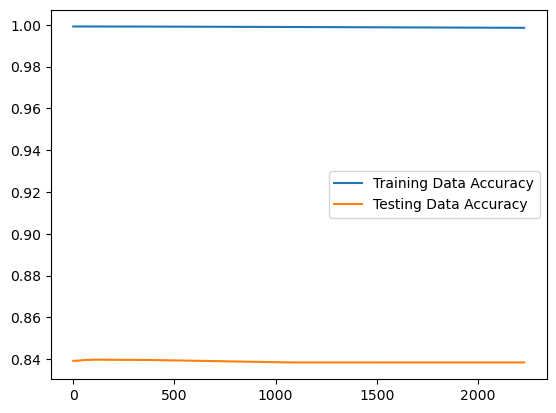

In [266]:
fig, ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Testing Data Accuracy")
ax.legend()

In [267]:
max_test = test_accuracy_list.index(max(test_accuracy_list))
max_test

5

In [268]:
best_ccp = ccp_alpha_list[max_test]
best_ccp

95.36601307189542

In [269]:
decision_tree_model = DecisionTreeRegressor(ccp_alpha= best_ccp,random_state=11)

decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=95.36601307189542, random_state=11)

In [270]:
def get_hyp_testing_accuracy(x_test, y_test):
    
    model_details.append("Decision Tree Hyperp Tunning(post-prunning)")
    
    y_pred = decision_tree_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(x_test, y_test)

Mean squared Error:  9758355.68215812
Root Mean squared Error:  3123.8366926198496
Mean Absolute Error:  2232.8429487179487
r_squared_value for Testing:  0.8397485019014599


In [271]:
def get_hyp_training_accuracy(x_train, y_train):
   
    y_pred_train = decision_tree_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(x_train, y_train)
    

Mean squared Error:  49180.65904139434
Root Mean squared Error:  221.76712795496618
Mean Absolute Error:  61.76688453159042
r_squared_value for Training:  0.9992057232598095


# Random Forest

In [272]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "Random Forest Tree Regular Model"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [273]:
def model_training(x_train, y_train):
    rf_regg = RandomForestRegressor()
    rf_regg.fit(x_train, y_train)
    return rf_regg

rf_regg = model_training(x_train,y_train)

In [274]:
def model_evalution_training(rf_regg, x_train, y_train):
    
    y_pred_train = rf_regg.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(rf_regg, x_train, y_train)

Mean squared Error:  1602722.3633157213
Root Mean squared Error:  1265.986715299857
Mean Absolute Error:  662.2396949891067
r_squared_value for Training:  0.9741157373858412


In [275]:
def model_evalution_testing(rf_regg, x_test, y_test):
    
    y_pred = rf_regg.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(rf_regg, x_test, y_test)

Mean squared Error:  10072367.149794506
Root Mean squared Error:  3173.6992847140555
Mean Absolute Error:  2016.7428012820515
r_squared_value for Testing:  0.8345918126243046


# Hyperparameter Tunning (Pre-prunning)

In [276]:
def get_best_estimator(x_train, y_train):
    
    rf_model = RandomForestRegressor(random_state=10, n_jobs=-1)
    
    hyperparameter = {"n_estimators" : np.arange(10,200),
                      "criterion":['squared_error', 'absolute_error'], 
                     "max_depth": np.arange(3,8),
                     "min_samples_split": np.arange(2,20),
                     "min_samples_leaf": np.arange(2,15), 
                     "max_features": ['sqrt', 'log2']
                     } 
    
    rscv_rf_reg = RandomizedSearchCV(rf_model, hyperparameter, cv=5)
    rscv_rf_reg.fit(x_train, y_train)
    rscv_rf_reg.best_estimator_

    model_details.append("Decision Tree Hyperp Tunning")
    
    best_params = rscv_rf_reg.best_params_
    best_params_list.append(best_params)
    
    return rscv_rf_reg.best_estimator_

best_params = get_best_estimator(x_train, y_train)

In [277]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    rf_model = best_params
    
    y_pred = rf_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  18445975.885983657
Root Mean squared Error:  4294.877866247614
Mean Absolute Error:  2493.8104770912146
r_squared_value for Testing:  0.6970805978077763


In [278]:
rf_model = best_params

In [279]:
def get_hyp_training_accuracy(x_train, y_train):
   
    y_pred_train = rf_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(x_train, y_train)
    

Mean squared Error:  6912420.521442364
Root Mean squared Error:  2629.1482501833866
Mean Absolute Error:  1507.6978999249973
r_squared_value for Training:  0.8883631300268637


# AdaBoost

In [280]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "AdaBoost Regular Model"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [281]:
def model_training(x_train, y_train):
    adb_regg = AdaBoostRegressor()
    adb_regg.fit(x_train, y_train)
    return adb_regg

adb_regg = model_training(x_train,y_train)

In [282]:
def model_evalution_training(adb_regg, x_train, y_train):
    
    y_pred_train = adb_regg.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(adb_regg, x_train, y_train)

Mean squared Error:  2755438.8412561333
Root Mean squared Error:  1659.9514574999273
Mean Absolute Error:  1367.3374219993577
r_squared_value for Training:  0.9554991530555705


In [283]:
def model_evalution_testing(adb_regg, x_test, y_test):
    
    y_pred = adb_regg.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(adb_regg, x_test, y_test)

Mean squared Error:  8288591.930399499
Root Mean squared Error:  2878.9914780004992
Mean Absolute Error:  2075.0369393409946
r_squared_value for Testing:  0.8638849292609267


# Hyper parameter for adaboost

In [284]:
def get_best_estimator(x_train, y_train):
    
    adb_reg = AdaBoostRegressor(random_state=30)
    
    param_grid = {"n_estimators" : np.arange(10,200,2),
                "learning_rate" : np.arange(0,2,0.001)
                }
    
    rscv_adb_reg = RandomizedSearchCV(adb_reg, param_grid, cv=7)
    rscv_adb_reg.fit(x_train, y_train)
    rscv_adb_reg.best_estimator_

    model_details.append("AdaBoost Hyperp Tunning")
    
    best_params = rscv_adb_reg.best_params_
    best_params_list.append(best_params)
    
    return rscv_adb_reg.best_estimator_

best_params = get_best_estimator(x_train, y_train)

In [285]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    rf_model = best_params
    
    y_pred = rf_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  7753945.067280137
Root Mean squared Error:  2784.5906462674434
Mean Absolute Error:  2092.9977658234125
r_squared_value for Testing:  0.8726648880530841


In [286]:
rf_model = best_params

In [287]:
def get_hyp_training_accuracy(x_train, y_train):
   
    y_pred_train = rf_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(x_train, y_train)
    

Mean squared Error:  2999190.9124152814
Root Mean squared Error:  1731.8172283515605
Mean Absolute Error:  1526.1473261950464
r_squared_value for Training:  0.9515625120208901


# Taking inputs from user

In [288]:
with open("Auto_linear_model.pkl","wb") as f:
    pickle.dump(Lasso_model,f)

In [289]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_others', 'make_mazda', 'make_mitsubishi',
       'make_nissan', 'make_peugot', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'fuel-system_others', 'fuel-system_2bbl', 'fuel-system_idi',
       'fuel-system_mpfi'],
      dtype='object')

In [290]:
fuel_type
aspiration
num_of_doors
drive_wheels
engine_location
engine_type
num_of_cylinders
column_names = x.columns


json_dict = {"fuel_type":fuel_type,
            "aspiration":aspiration,
            "num_of_doors":num_of_doors,
            "drive_wheels":drive_wheels,
            "engine_location":engine_location,
            "engine_type":engine_type,
            "num_of_cylinders":num_of_cylinders,
             "columns":list(column_names)}

json_dict


{'fuel_type': {'gas': 0, 'diesel': 1},
 'aspiration': {'std': 0, 'turbo': 1},
 'num_of_doors': {'four': 4, 'two': 2},
 'drive_wheels': {'fwd': 0, 'rwd': 1, '4wd': 4},
 'engine_location': {'front': 0, 'rear': 1},
 'engine_type': {'ohc': 0,
  'ohcf': 1,
  'ohcv': 2,
  'dohc': 3,
  'rotor': 4,
  'dohcv': 5},
 'num_of_cylinders': {'four': 4,
  'six': 6,
  'five': 5,
  'eight': 8,
  'two': 2,
  'three': 3,
  'twelve': 12},
 'columns': ['symboling',
  'normalized-losses',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'drive-wheels',
  'engine-location',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'engine-type',
  'num-of-cylinders',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'make_others',
  'make_mazda',
  'make_mitsubishi',
  'make_nissan',
  'make_peugot',
  'make_subaru',
  'make_toyota',
  'make_volkswagen',
  'make_volvo',
  'body-style_hardtop',
  'body-style_hatchback',
  

## Creating json file

In [291]:
# with open("Autos_data.json","w") as f:
#     json.dump(json_dict,f)

# Taking user input 

In [292]:
df.head(1)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_volkswagen,make_volvo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_others,fuel-system_2bbl,fuel-system_idi,fuel-system_mpfi
0,3,122,0,0,2,1,0,88.6,168.8,64.1,...,0.0,0.0,0,0,0,0,0,0,0,1


In [293]:
df.head(1).T

,0
symboling,3.00
normalized-losses,122.00
fuel-type,0.00
aspiration,0.00
num-of-doors,2.00
drive-wheels,1.00
engine-location,0.00
wheel-base,88.60
length,168.80
width,64.10


In [294]:
json_dict

{'fuel_type': {'gas': 0, 'diesel': 1},
 'aspiration': {'std': 0, 'turbo': 1},
 'num_of_doors': {'four': 4, 'two': 2},
 'drive_wheels': {'fwd': 0, 'rwd': 1, '4wd': 4},
 'engine_location': {'front': 0, 'rear': 1},
 'engine_type': {'ohc': 0,
  'ohcf': 1,
  'ohcv': 2,
  'dohc': 3,
  'rotor': 4,
  'dohcv': 5},
 'num_of_cylinders': {'four': 4,
  'six': 6,
  'five': 5,
  'eight': 8,
  'two': 2,
  'three': 3,
  'twelve': 12},
 'columns': ['symboling',
  'normalized-losses',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'drive-wheels',
  'engine-location',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'engine-type',
  'num-of-cylinders',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'make_others',
  'make_mazda',
  'make_mitsubishi',
  'make_nissan',
  'make_peugot',
  'make_subaru',
  'make_toyota',
  'make_volkswagen',
  'make_volvo',
  'body-style_hardtop',
  'body-style_hatchback',
  

In [295]:
symboling              = 3
normalized_losses      = 122
fuel_type              = "gas"
aspiration             = "std"
num_of_doors           = "four"
drive_wheels           = "fwd"
engine_location        = "front"
wheel_base             = 88.60
length                 = 168.80
width                  = 64.10
height                 = 48.80
curb_weight            = 2548.00
engine_type            = "ohc"
num_of_cylinders       = "four"
engine_size            = 130
bore                   = 3.47
stroke                 = 2.68
compression_ratio      = 9.00
horsepower             = 111
peak_rpm               = 5000
city_mpg               = 21
highway_mpg            = 27
make                   = "mazda"
make                   = "make_" + make
body_style             = "hardtop"
body_style             = "body-style_" + body_style
fuel_system            = "mpfi"
fuel_system            = "fuel-system_" + fuel_system

In [296]:
make_index = list(column_names).index(make)
make_index

23

In [297]:
body_style_index = list(column_names).index(body_style)
body_style_index

31

In [298]:
fuel_system_index = list(column_names).index(fuel_system)
fuel_system_index

38

In [299]:
test_array = np.zeros(len(column_names))

test_array[0] = symboling
test_array[1] = normalized_losses
test_array[2] = json_dict['fuel_type'][fuel_type]
test_array[3] = json_dict['aspiration'][aspiration]
test_array[4] = json_dict['num_of_doors'][num_of_doors]
test_array[5] = json_dict['drive_wheels'][drive_wheels]
test_array[6] = json_dict['engine_location'][engine_location]
test_array[7] = wheel_base
test_array[8] = length
test_array[9] = width
test_array[10] = height
test_array[11] = curb_weight
test_array[12] = json_dict['engine_type'][engine_type]
test_array[13] = json_dict['num_of_cylinders'][num_of_cylinders]
test_array[14] = engine_size
test_array[15] = bore
test_array[16] = stroke
test_array[17] = compression_ratio
test_array[18] = horsepower
test_array[19] = peak_rpm
test_array[20] = city_mpg
test_array[21] = highway_mpg
test_array[make_index] = 1
test_array[body_style_index] = 1
test_array[fuel_system_index] = 1

test_array

array([3.000e+00, 1.220e+02, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
       0.000e+00, 8.860e+01, 1.688e+02, 6.410e+01, 4.880e+01, 2.548e+03,
       0.000e+00, 4.000e+00, 1.300e+02, 3.470e+00, 2.680e+00, 9.000e+00,
       1.110e+02, 5.000e+03, 2.100e+01, 2.700e+01, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00])

In [300]:
price = round(model.predict([test_array])[0],2)
print(f"The Total Price of your Car is: $ {price}/- Only")

The Total Price of your Car is: $ 15835.63/- Only


In [301]:
comparison_df = pd.DataFrame({"Model Details":model_details, "Training Accuracy":Training_accuracy,
                              "Testing Accuracy":Testing_accuracy})
comparison_df

,Model Details,Training Accuracy,Testing Accuracy
0,Linear Regression Regular Model,0.896226,0.842054
1,Ridge Regression Hyperp Tunning GSCV,0.895832,0.873224
2,Ridge Regression Hyperp Tunning RSCV,0.896216,0.849790
3,Lasso Regression Hyperp Tunning GSCV,0.895623,0.886684
4,Lasso Regression Hyperp Tunning RSCV,0.895641,0.886541
5,KNN Regressor Regular Model,0.849706,0.669197
6,KNN Regressor Using Standardization,0.853328,0.690145
7,KNN Regressor Using Normalization,0.809067,0.580523
8,KNN Regressor Hyperp Tunning,0.926532,0.746573
9,Decision Tree Regular Model,0.999216,0.831107


In [302]:
comparison_df["Difference_in_%"] = (comparison_df['Training Accuracy'] - comparison_df['Testing Accuracy']) *100
comparison_df

,Model Details,Training Accuracy,Testing Accuracy,Difference_in_%
0,Linear Regression Regular Model,0.896226,0.842054,5.417179
1,Ridge Regression Hyperp Tunning GSCV,0.895832,0.873224,2.260758
2,Ridge Regression Hyperp Tunning RSCV,0.896216,0.849790,4.642617
3,Lasso Regression Hyperp Tunning GSCV,0.895623,0.886684,0.893898
4,Lasso Regression Hyperp Tunning RSCV,0.895641,0.886541,0.910001
5,KNN Regressor Regular Model,0.849706,0.669197,18.050822
6,KNN Regressor Using Standardization,0.853328,0.690145,16.318291
7,KNN Regressor Using Normalization,0.809067,0.580523,22.854381
8,KNN Regressor Hyperp Tunning,0.926532,0.746573,17.995887
9,Decision Tree Regular Model,0.999216,0.831107,16.810995
